In [2]:
library(Seurat)
library(harmony)
library(ggplot2)
library(openxlsx)
library(readxl)
library(tidyr)
library(dplyr)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: Rcpp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Integration_mesen")
load("data_merged_mesen_ann.RData")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



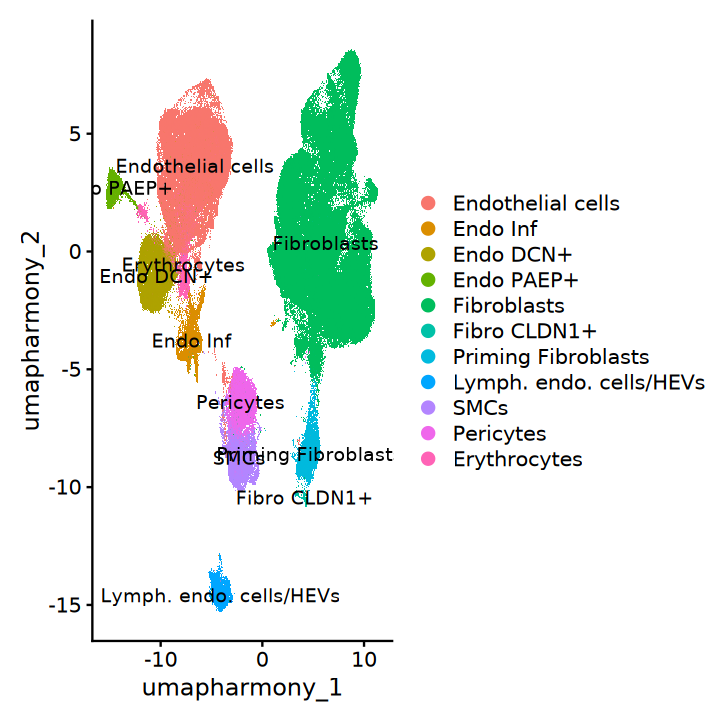

In [8]:
options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_mesen, label = T)

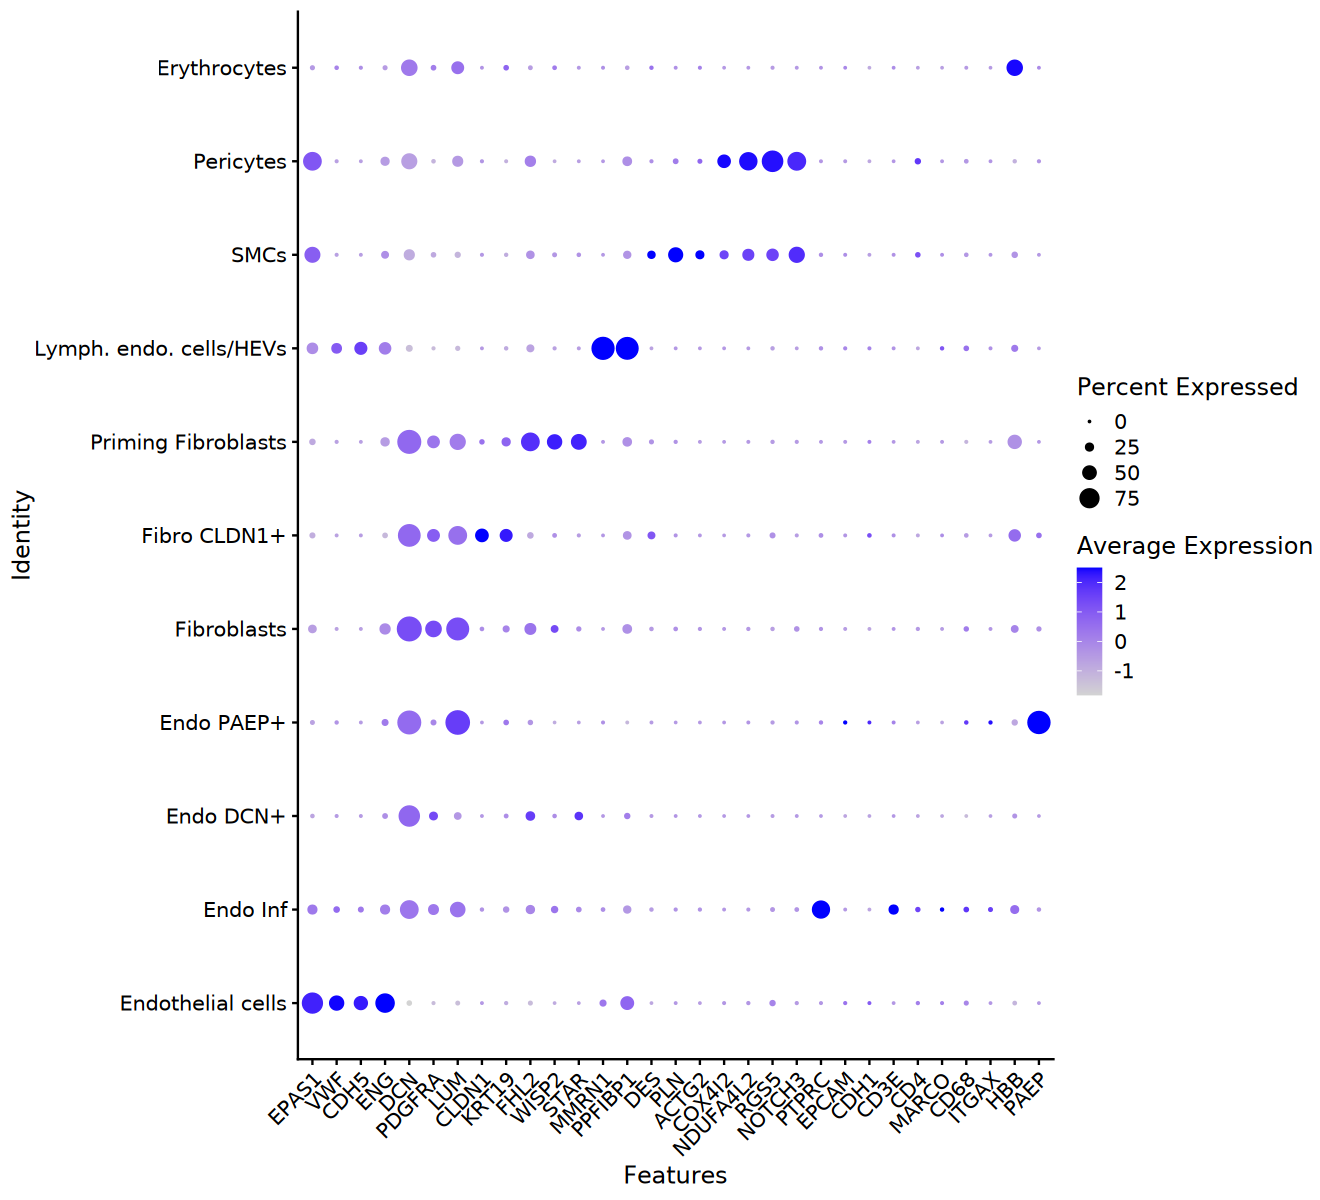

In [31]:
#Dotplotting
features <- c( "EPAS1", "VWF", "CDH5", "ENG", 
              "DCN", "PDGFRA", "LUM", "CLDN1", "KRT19", "FHL2", "WISP2", "STAR", "MMRN1", "PPFIBP1",
              "DES", "PLN", "ACTG2", "COX4I2", "NDUFA4L2", "RGS5", "NOTCH3",
              "PTPRC", "EPCAM", "CDH1", "CD3E", "CD4", "MARCO", "CD68", "ITGAX", "HBB", "PAEP"
             ) 
options(repr.plot.width=11, repr.plot.height=10)
DotPlot(data_merged_mesen, features = features, group.by = "cells") + RotatedAxis()

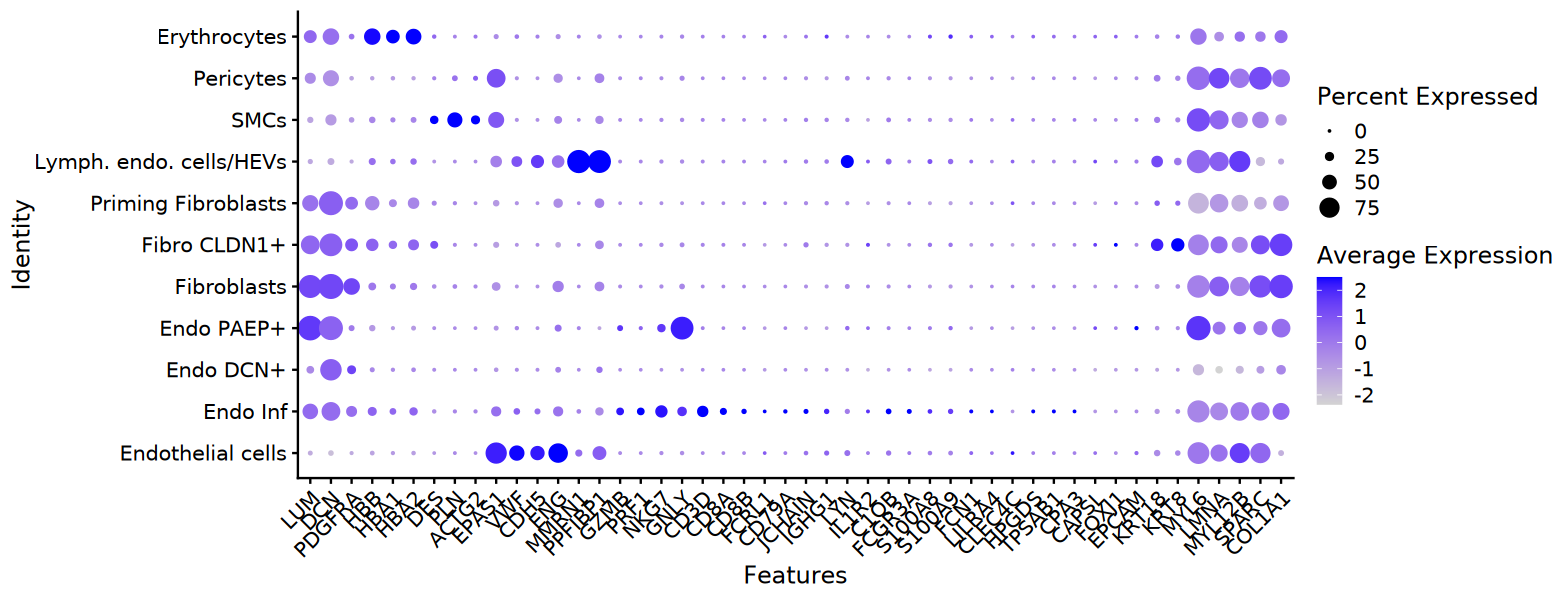

In [44]:
features <- c("LUM", "DCN", "PDGFRA", "HBB", "HBA1", "HBA2", "DES", "PLN", "ACTG2",
              "EPAS1", "VWF", "CDH5", "ENG", "MMRN1", "PPFIBP1",
              "GZMB", "PRF1", "NKG7", "GNLY", "CD3D", "CD8A", "CD8B",
              "FCRL1", "CD79A", "JCHAIN", "IGHG1",
              "LYN", "IL1R2", "C1QB", "FCGR3A", "S100A8", "S100A9", "FCN1", "LILRA4", "CLEC4C",
              "HPGDS", "TPSAB1", "CPA3",
              "CAPSL", "FOXJ1", "EPCAM", "KRT18", "KRT8",
              #"MKI67", "TOP2A", "TWIST1", "TWIST2", "SNAI1", "SNAI2", "SNAI3", "IER3", "IFITM3", "FOS", "JUN",
              "MYL6", "LMNA", "MYL12B", "SPARC", "COL1A1"
             ) 
options(repr.plot.width=13, repr.plot.height=5)
DotPlot(data_merged_mesen, features = features, group.by = "cells") + RotatedAxis()

In [39]:
#Markers of 24
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Integration_mesen")
library(future)
plan("multicore", workers = 6)
data_merged_mesen@active.ident <- as.factor(data_merged_mesen$cells)
cls_DCN <- FindMarkers(data_merged_mesen, ident.1 = "Endo DCN+", logfc.threshold = 1)
cls_DCN$genes <- rownames(cls_DCN)
write.xlsx(cls_DCN, "data_merged_mesen_cls_DCNpos.xlsx") 

In [ ]:
#Decision
#PAEP- and DCN-positive cells seem to be of interest and will be retained in the new subset. They are not endothelial cells and express Fibroblast markers.
#Erythrocytes and Endo Inf will be removed. 

In [53]:
#Rename clusters
data_merged_mesen$cells <- as.character(data_merged_mesen$cells)
data_merged_mesen$cells <- 
ifelse(data_merged_mesen$cells == "Endo DCN+", "Fibroblasts inactive",
ifelse(data_merged_mesen$cells == "Endo PAEP+", "Fibroblasts PAEP+",
ifelse(data_merged_mesen$cells == "Fibro CLDN1+", "Fibroblasts CLDN1+",       
ifelse(data_merged_mesen$cells == "Priming Fibroblasts", "Fibroblasts priming",  data_merged_mesen$cells ))))
data_merged_mesen$cells <- as.factor(data_merged_mesen$cells)

In [56]:
#Subset unwanted clusters
data_merged_mesen@active.ident <- as.factor(data_merged_mesen$cells)
data_merged_mesen_clean <- subset(data_merged_mesen, idents = c('Endo Inf', 'Erythrocytes'), invert = TRUE)

In [57]:
data_merged_mesen_clean

An object of class Seurat 
75626 features across 357140 samples within 1 assay 
Active assay: RNA (75626 features, 2000 variable features)
 4 layers present: data, counts, scale.data.5, scale.data
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [58]:
#Removing the data and scale.data layers
#Getting counts layer and adding it back into the object
data_merged_mesen_clean@assays$RNA@layers$data = NULL
data_merged_mesen_clean@assays$RNA@layers$scale.data = NULL
data_merged_mesen_clean@assays$RNA@layers$scale.data.5 = NULL
counts = GetAssayData(data_merged_mesen_clean, assay = "RNA", layer = "counts")
data_merged_mesen_clean[["RNA"]] = CreateAssay5Object(counts = counts)

Warning message:
“Different cells and/or features from existing assay RNA”


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



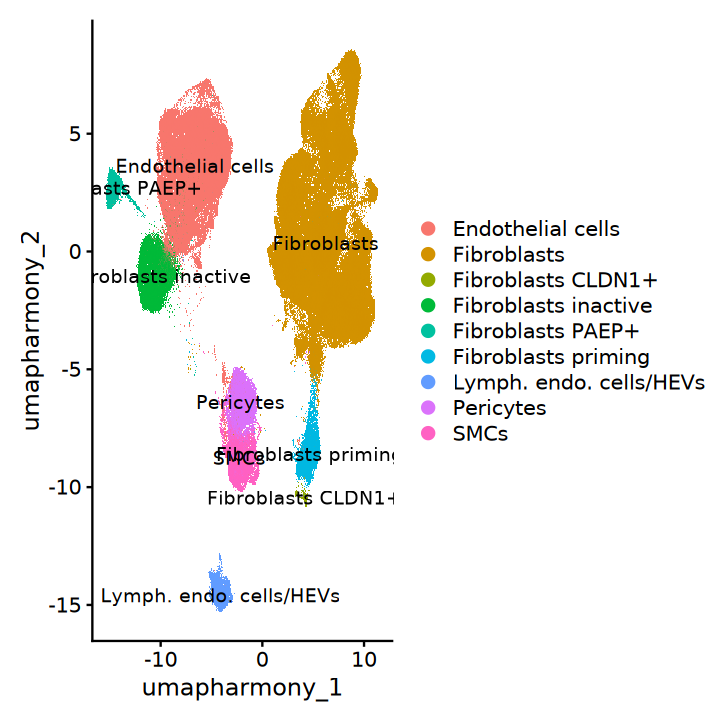

In [59]:
#Are there missing cells still?
options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_mesen_clean, label = T)

In [ ]:
#After subsetting, the dataset needs to be deconstructed and conctructed together again. This also means that we would also repeat the dimensional reduction again. 

Normalizing layer: counts.Adams

Normalizing layer: counts.Habermann

Normalizing layer: counts.Reyfman

Normalizing layer: counts.Ramachandran

Normalizing layer: counts.Fonseca

Normalizing layer: counts.Kuppe

Normalizing layer: counts.Panc

Normalizing layer: counts.Deng

Finding variable features for layer counts.Adams

Finding variable features for layer counts.Habermann

Finding variable features for layer counts.Reyfman

Finding variable features for layer counts.Ramachandran

Finding variable features for layer counts.Fonseca

Finding variable features for layer counts.Kuppe

Finding variable features for layer counts.Panc

Finding variable features for layer counts.Deng

Centering and scaling data matrix

PC_ 1 
Positive:  DCN, COL1A2, COL1A1, LUM, COL3A1, COL6A2, SERPINF1, FBLN1, C1R, C1S 
	   LGALS1, COL6A1, PCOLCE, COL6A3, CCDC80, MMP2, AEBP1, RARRES2, COL14A1, CFD 
	   CTSK, LRP1, MFAP4, MXRA8, IGFBP6, MEG3, OLFML3, SPON2, C3, VCAN 
Negative:  CD74, PECAM1, RNASE1, EGFL7,

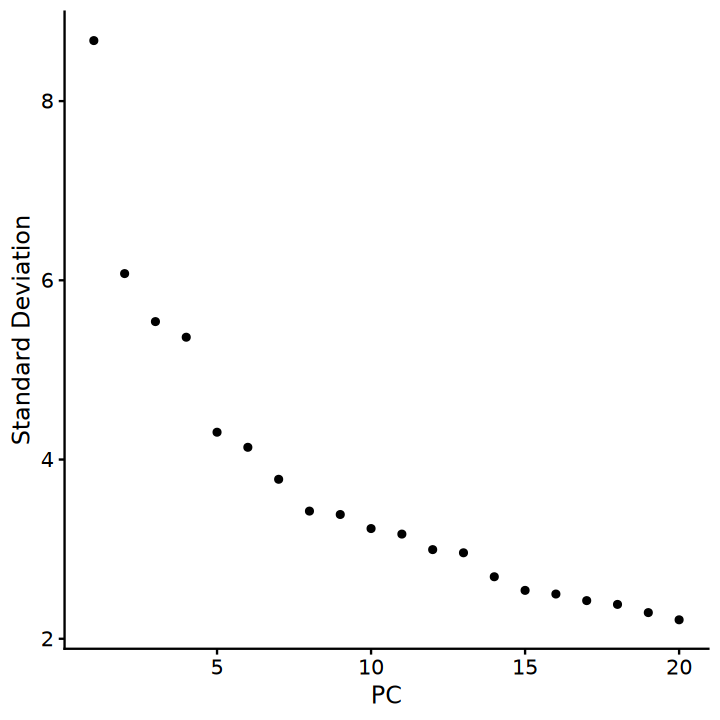

In [62]:
#Test RunUMAP with a fresh integration (WORKS!)
#Useful to find new clusters as smaller differences in gene expression across these cells are taken into account via re-integration preprocessing steps
options(future.globals.maxSize = 8000 * 1024^2)
#data_merged_mesen_clean[["RNA"]] <- split(data_merged_mesen_clean[["RNA"]], f = data_merged_mesen_clean$study)
data_merged_mesen_clean <- NormalizeData(data_merged_mesen_clean)
data_merged_mesen_clean <- FindVariableFeatures(data_merged_mesen_clean)
data_merged_mesen_clean <- ScaleData(data_merged_mesen_clean)
data_merged_mesen_clean <- RunPCA(data_merged_mesen_clean)
data_merged_mesen_clean <- IntegrateLayers(data_merged_mesen_clean, method = HarmonyIntegration, orig.reduction = "pca", new.reduction = "harmony", verbose = FALSE)
ElbowPlot(data_merged_mesen_clean)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 357140
Number of edges: 9866134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9595
Number of communities: 14
Elapsed time: 311 seconds


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 357140
Number of edges: 9866134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9326
Number of communities: 24
Elapsed time: 291 seconds


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
14:02:03 UMAP embedding parameters a = 0.9922 b = 1.112

14:02:03 Read 357140 rows and found 15 numeric columns

14:02:03 Using Annoy for neighbor search, n_neighbors = 30

14:02:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:02:38 Writing NN index file to temp file /t

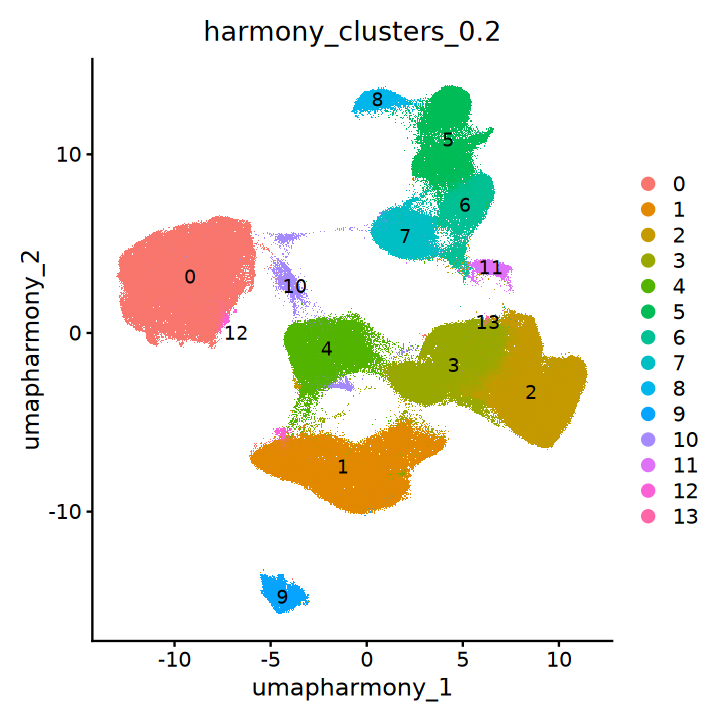

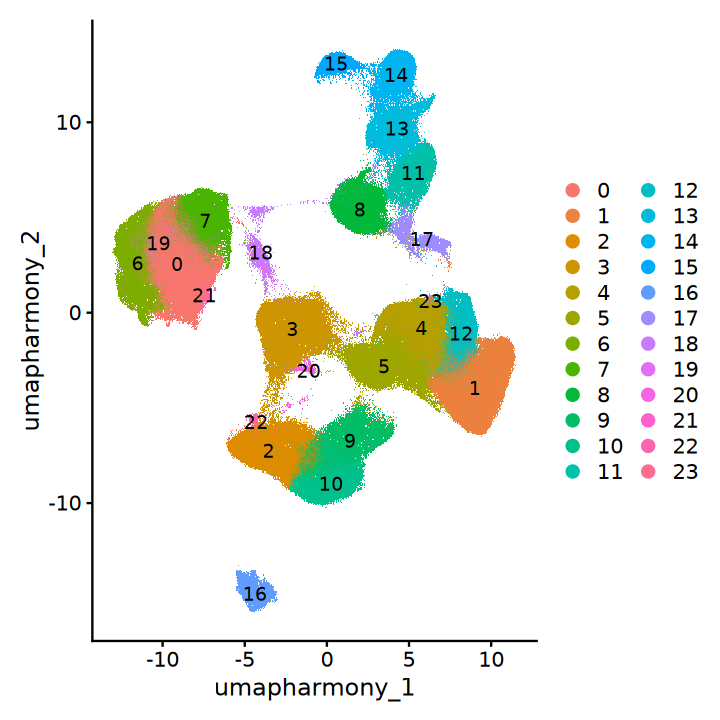

In [63]:
data_merged_mesen_clean <- FindNeighbors(data_merged_mesen_clean, reduction = "harmony", dims = 1:15)
data_merged_mesen_clean <- FindClusters(data_merged_mesen_clean, resolution = 0.2, cluster.name = "harmony_clusters_0.2")
data_merged_mesen_clean <- FindClusters(data_merged_mesen_clean, resolution = 0.5, cluster.name = "harmony_clusters_0.5")
data_merged_mesen_clean <- RunUMAP(data_merged_mesen_clean, reduction = "harmony", dims = 1:15, reduction.name = "umap.harmony")

options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_mesen_clean, label = T, group.by = "harmony_clusters_0.2")
options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_mesen_clean, label = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



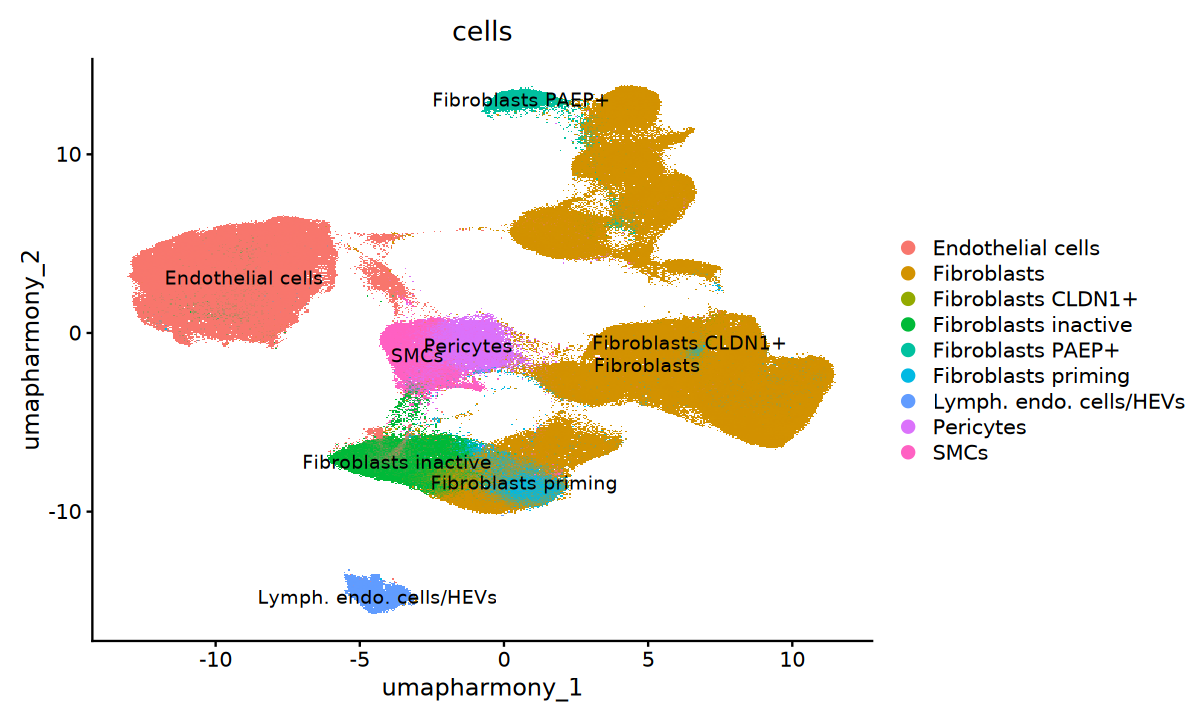

In [66]:
options(repr.plot.height = 6, repr.plot.width = 10)
DimPlot(data_merged_mesen_clean, label = T, group.by = "cells")

In [68]:
table(data_merged_mesen_clean$`harmony_clusters_0.2`, data_merged_mesen_clean$study)

    
     Adams  Deng Fonseca Habermann Kuppe  Panc Ramachandran Reyfman
  0   4503 12192   16703      8985 29184  2659         7318    1053
  1     53    13   57801        29   371  2030           20      18
  2   2527  9774   40966      1972  3262   713           58     105
  3   3054  3418   14692      1797 18240  2362          369     246
  4   1200  5532   12434      1407  5802   714         1851     142
  5      0     1   24875         0     1     0            0       0
  6      0     3   16450         0     5     1            0       1
  7      1     3   16144         0     0     0            0       0
  8      0     0    8589         0     0     0            0       0
  9   1715   987    1710      1211   436   343          294     246
  10    51    44    1610        17  2486    31           36       9
  11     0   254    2674         2     0     0            0       0
  12    15     0       0         0     2  1174            0       1
  13     0     0       0         0     0   

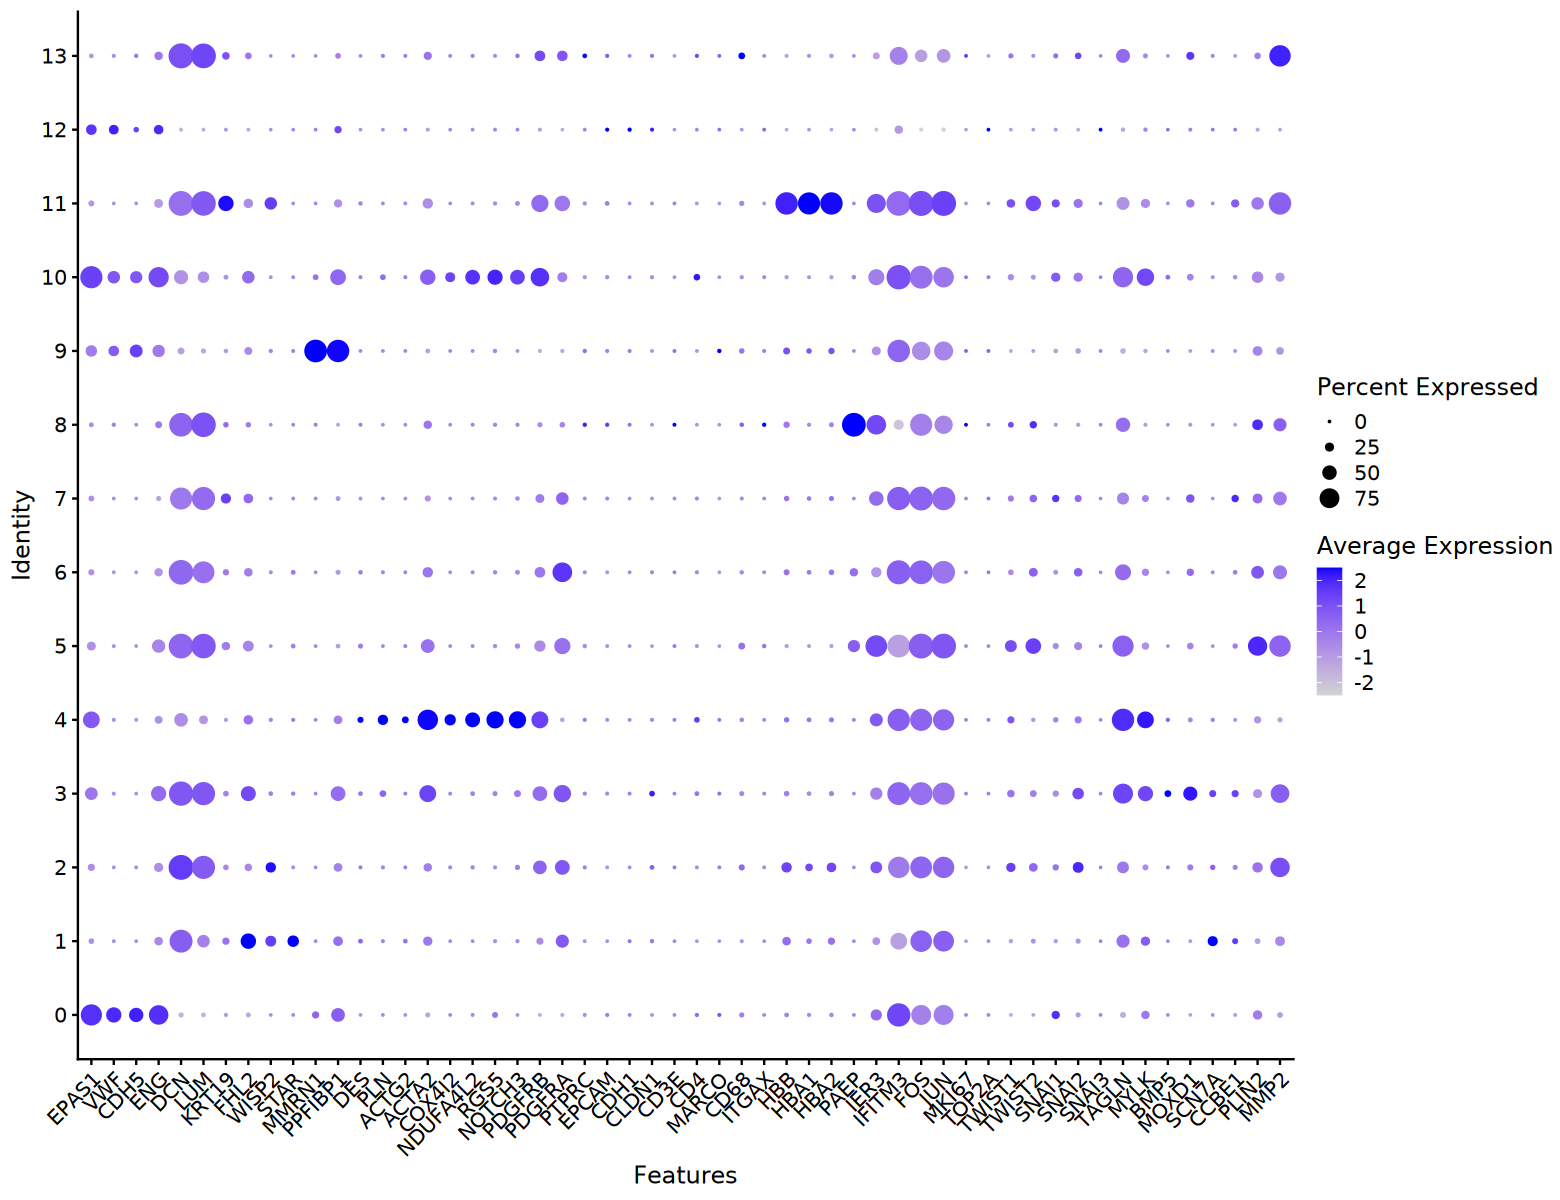

In [90]:
#Dotplotting - Look at main marker genes 
features <- c( "EPAS1", "VWF", "CDH5", "ENG", 
              "DCN",  "LUM", "KRT19", "FHL2", "WISP2", "STAR", "MMRN1", "PPFIBP1",
              "DES", "PLN", "ACTG2", "ACTA2", "COX4I2", "NDUFA4L2", "RGS5", "NOTCH3", "PDGFRB", "PDGFRA",
              "PTPRC", "EPCAM", "CDH1", "CLDN1", "CD3E", "CD4", "MARCO", "CD68", "ITGAX", "HBB", "HBA1", "HBA2",
            "PAEP", "IER3", "IFITM3", "FOS", "JUN", "MKI67", "TOP2A", "TWIST1", "TWIST2", "SNAI1", "SNAI2", "SNAI3", "TAGLN", "MYLK", "BMP5", "MOXD1", "SCN7A", "CCBE1", "PLIN2", "MMP2"
             ) 
options(repr.plot.width=13, repr.plot.height=10)
DotPlot(data_merged_mesen_clean, features = features, group.by = "harmony_clusters_0.2") + RotatedAxis()

Warning message:
“Cannot find cell-level meta data named  cells”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



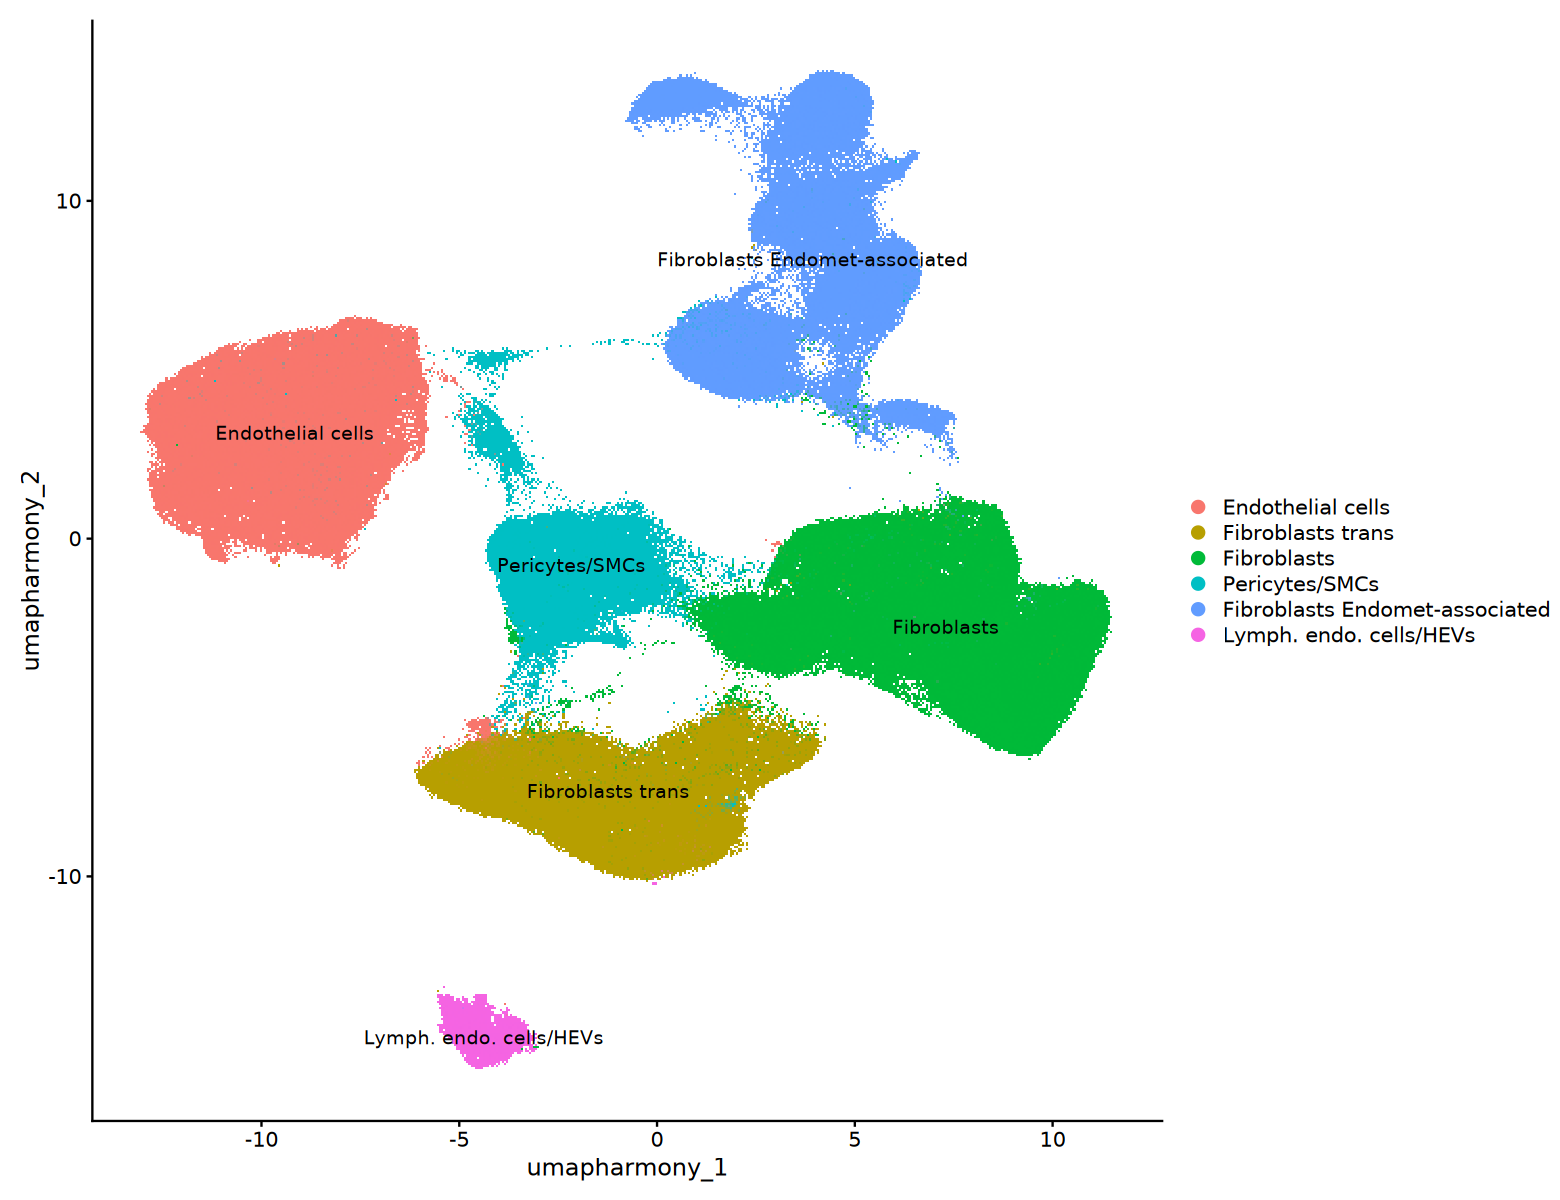

In [92]:
#Assigning new names
data_merged_mesen_clean$cells <- NULL
data_merged_mesen_clean@active.ident <- factor(data_merged_mesen_clean$`harmony_clusters_0.2`)

cluster.ids.new <- c("Endothelial cells", "Fibroblasts trans", "Fibroblasts", "Fibroblasts", "Pericytes/SMCs", 
                     "Fibroblasts Endomet-associated", "Fibroblasts Endomet-associated", "Fibroblasts Endomet-associated", 
                     "Fibroblasts Endomet-associated", "Lymph. endo. cells/HEVs", "Pericytes/SMCs", "Fibroblasts Endomet-associated", 
                     "Endothelial cells", "Fibroblasts"

)

names(cluster.ids.new) <- levels(data_merged_mesen_clean)
data_merged_mesen_clean <- RenameIdents(data_merged_mesen_clean, cluster.ids.new)
options(repr.plot.width=13, repr.plot.height=10)
DimPlot(data_merged_mesen_clean, reduction = "umap.harmony", label = TRUE)
data_merged_mesen_clean$cells <- data_merged_mesen_clean@active.ident

In [102]:
cellytpe_colors <- c(
    "Endothelial cells" = "#f9c7be",
  "Fibroblasts" = "#e65c6f",
    "Fibroblasts trans" = "#fdaaaa",
  "Lymph. endo. cells/HEVs" = "#f98d77",
     "Pericytes/SMCs" = "#bd4545",
     "Fibroblasts Endomet-associated" = "#cab2fb"
)

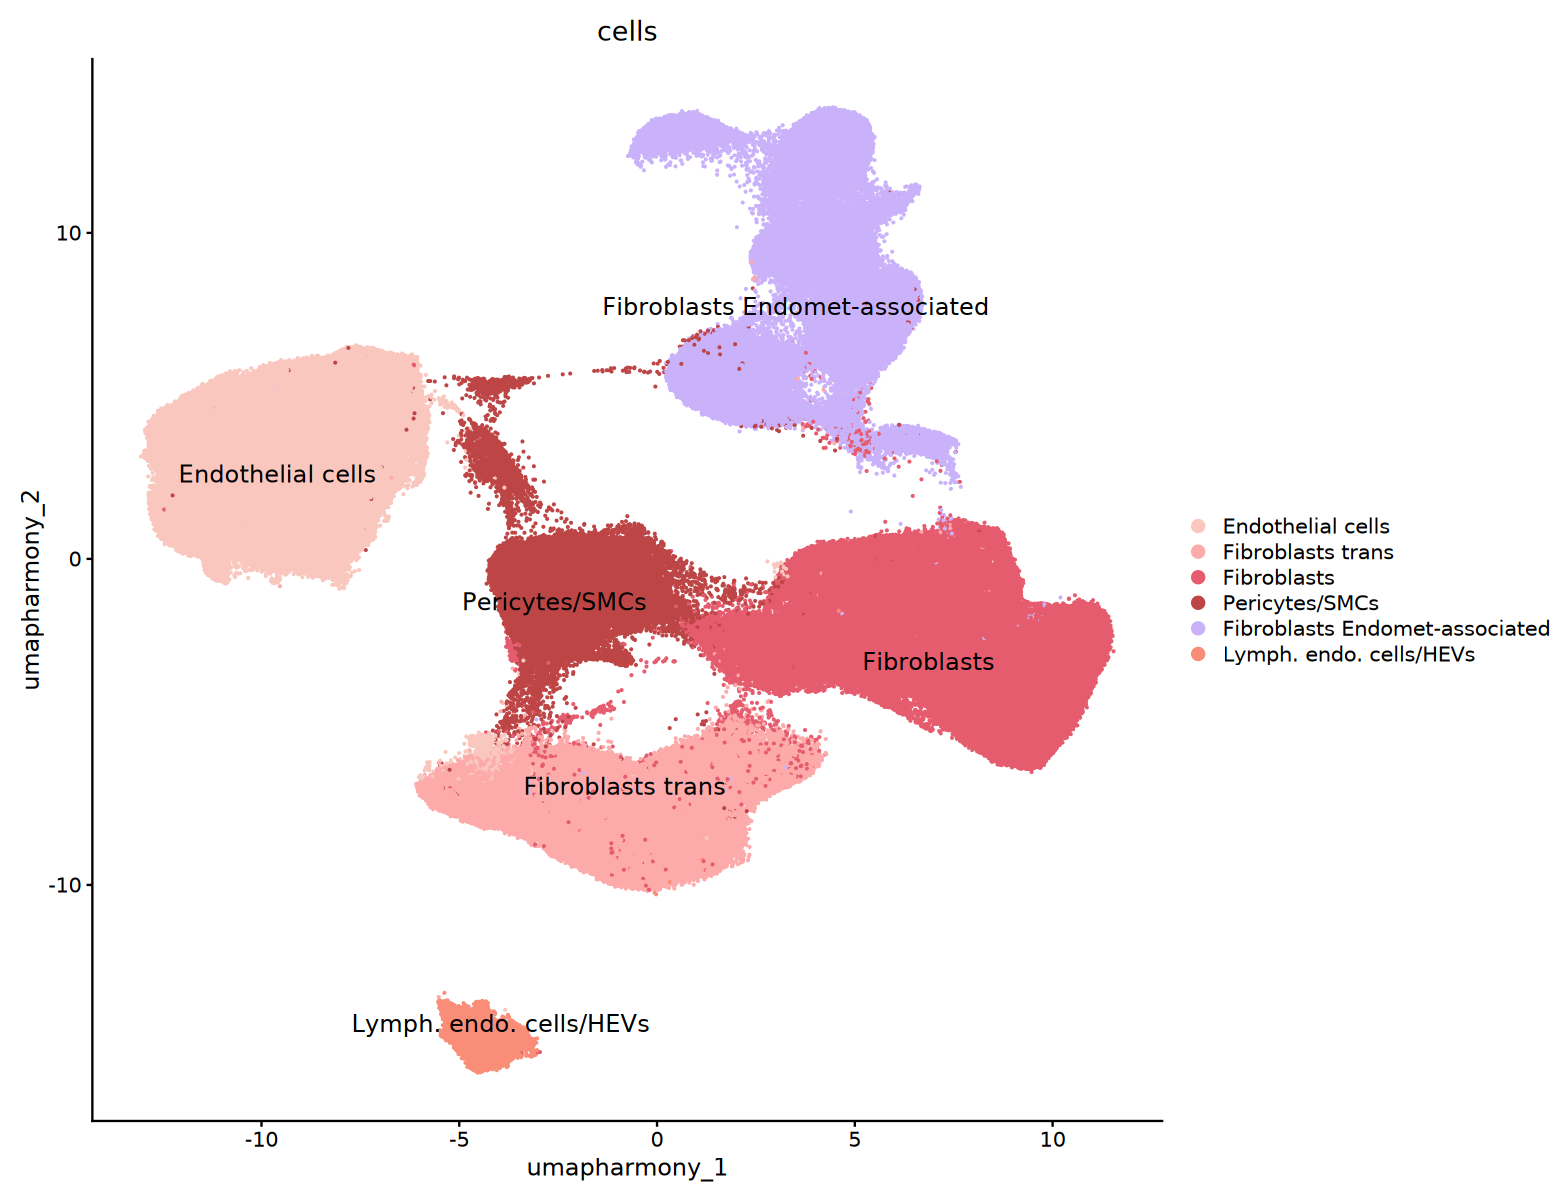

In [103]:
options(repr.plot.width=13, repr.plot.height=10)
DimPlot(data_merged_mesen_clean, reduction = "umap.harmony", cols = cellytpe_colors,  label = TRUE, repel = TRUE, group.by = "cells",pt.size = 0.1, label.size = 5, raster = FALSE)

In [104]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Figures")
p <- DimPlot(data_merged_mesen_clean, reduction = "umap.harmony", cols = cellytpe_colors,  label = TRUE, repel = TRUE, group.by = "cells",pt.size = 0.1, label.size = 5, raster = FALSE)
ggsave("data_merged_mesen_UMAP_clean_withFonseca.pdf", plot = p, width = 13, height = 10)

In [105]:
unique(data_merged_mesen_clean$`harmony_clusters_0.2`)

[1] 9  2  0  3  4  1  12 10 7  11 6  8  5  13
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13

In [114]:
data_merged_mesen

An object of class Seurat 
75626 features across 371681 samples within 1 assay 
Active assay: RNA (75626 features, 2000 variable features)
 4 layers present: data, counts, scale.data.5, scale.data
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [ ]:
#Further subsetting due to unwanted tissue-specific clusters

In [116]:
#Subset unwanted clusters
data_merged_mesen_clean@active.ident <- as.factor(data_merged_mesen_clean$`harmony_clusters_0.2`)
data_merged_mesen_clean_woEndo_woPanc <- subset(data_merged_mesen_clean, idents = c(5, 6, 7, 8, 10, 11, 12, 13), invert = TRUE)

In [117]:
data_merged_mesen_clean_woEndo_woPanc

An object of class Seurat 
75626 features across 282511 samples within 1 assay 
Active assay: RNA (75626 features, 0 variable features)
 1 layer present: counts
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [118]:
# Removing the data and scale.data layers
# Getting counts layer and adding it back into the object
data_merged_mesen_clean_woEndo_woPanc@assays$RNA@layers$data = NULL
data_merged_mesen_clean_woEndo_woPanc@assays$RNA@layers$scale.data = NULL
counts = GetAssayData(data_merged_mesen_clean_woEndo_woPanc, assay = "RNA", layer = "counts")
data_merged_mesen_clean_woEndo_woPanc[["RNA"]] = CreateAssay5Object(counts = counts)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



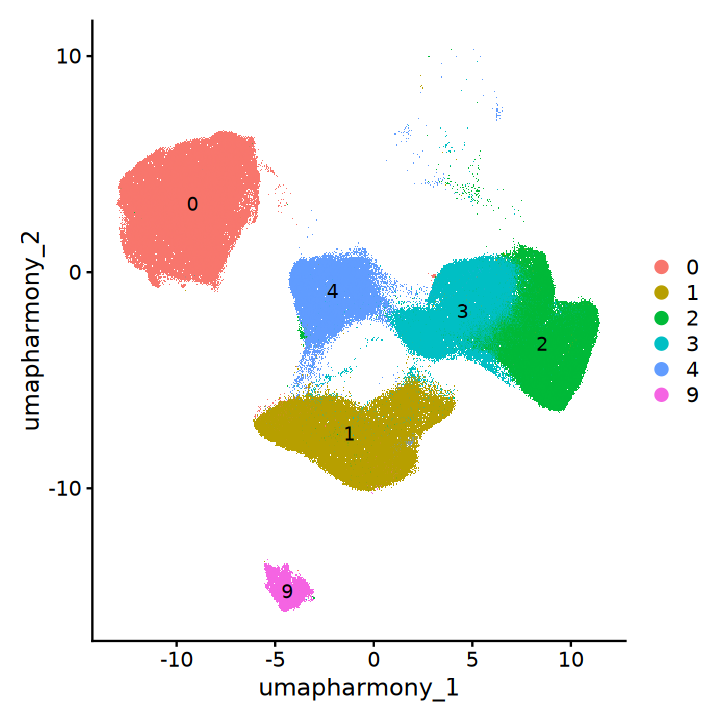

In [119]:
#Are there missing cells still?
options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_mesen_clean_woEndo_woPanc, label = T)

In [120]:
data_merged_mesen_clean_woEndo_woPanc <- RunUMAP(data_merged_mesen_clean_woEndo_woPanc, reduction = "harmony", dims = 1:20, reduction.name = "umap.harmony")

16:52:38 UMAP embedding parameters a = 0.9922 b = 1.112

16:52:38 Read 282511 rows and found 20 numeric columns

16:52:38 Using Annoy for neighbor search, n_neighbors = 30

16:52:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:53:05 Writing NN index file to temp file /tmp/RtmpwdVtcN/file15a5b41beb7641

16:53:05 Searching Annoy index using 6 threads, search_k = 3000

16:53:30 Annoy recall = 100%

16:53:31 Commencing smooth kNN distance calibration using 6 threads
 with target n_neighbors = 30

16:53:39 Initializing from normalized Laplacian + noise (using RSpectra)

16:54:02 Commencing optimization for 200 epochs, with 12696502 positive edges

16:56:58 Optimization finished



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



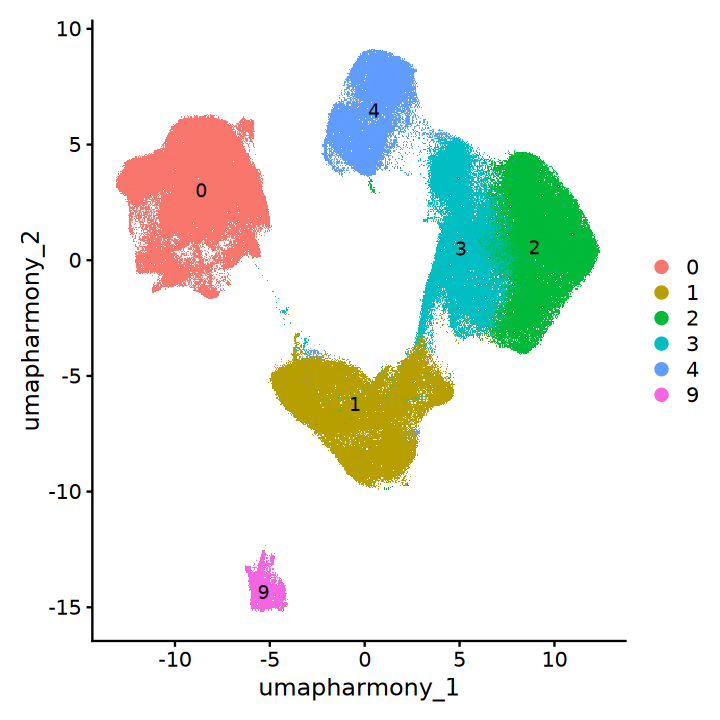

In [121]:
#UMAP post RunUMAP
options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_mesen_clean_woEndo_woPanc, label = T)

In [122]:
table(data_merged_mesen_clean_woEndo_woPanc$`harmony_clusters_0.2`, data_merged_mesen_clean_woEndo_woPanc$study)

    
     Adams  Deng Fonseca Habermann Kuppe  Panc Ramachandran Reyfman
  0   4503 12192   16703      8985 29184  2659         7318    1053
  1     53    13   57801        29   371  2030           20      18
  2   2527  9774   40966      1972  3262   713           58     105
  3   3054  3418   14692      1797 18240  2362          369     246
  4   1200  5532   12434      1407  5802   714         1851     142
  5      0     0       0         0     0     0            0       0
  6      0     0       0         0     0     0            0       0
  7      0     0       0         0     0     0            0       0
  8      0     0       0         0     0     0            0       0
  9   1715   987    1710      1211   436   343          294     246
  10     0     0       0         0     0     0            0       0
  11     0     0       0         0     0     0            0       0
  12     0     0       0         0     0     0            0       0
  13     0     0       0         0     0   

In [115]:
#Saving
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Integration_mesen")
save(data_merged_mesen_clean_woEndo, file = "data_merged_mesen_clean_woEndo.RData")

Normalizing layer: counts.Adams

Normalizing layer: counts.Habermann

Normalizing layer: counts.Reyfman

Normalizing layer: counts.Ramachandran

Normalizing layer: counts.Fonseca

Normalizing layer: counts.Kuppe

Normalizing layer: counts.Panc

Normalizing layer: counts.Deng

Finding variable features for layer counts.Adams

Finding variable features for layer counts.Habermann

Finding variable features for layer counts.Reyfman

Finding variable features for layer counts.Ramachandran

Finding variable features for layer counts.Fonseca

Finding variable features for layer counts.Kuppe

Finding variable features for layer counts.Panc

Finding variable features for layer counts.Deng

Centering and scaling data matrix

PC_ 1 
Positive:  DCN, COL1A2, LUM, COL1A1, COL6A2, C1S, C1R, SERPINF1, COL3A1, FBLN1 
	   CCDC80, PCOLCE, COL6A3, COL6A1, AEBP1, RARRES2, COL14A1, MFAP4, LGALS1, MMP2 
	   LRP1, CTSK, SFRP2, C3, OLFML3, CFD, MXRA8, IGFBP6, LGALS3BP, THBS2 
Negative:  CD74, PECAM1, EGFL7, RN

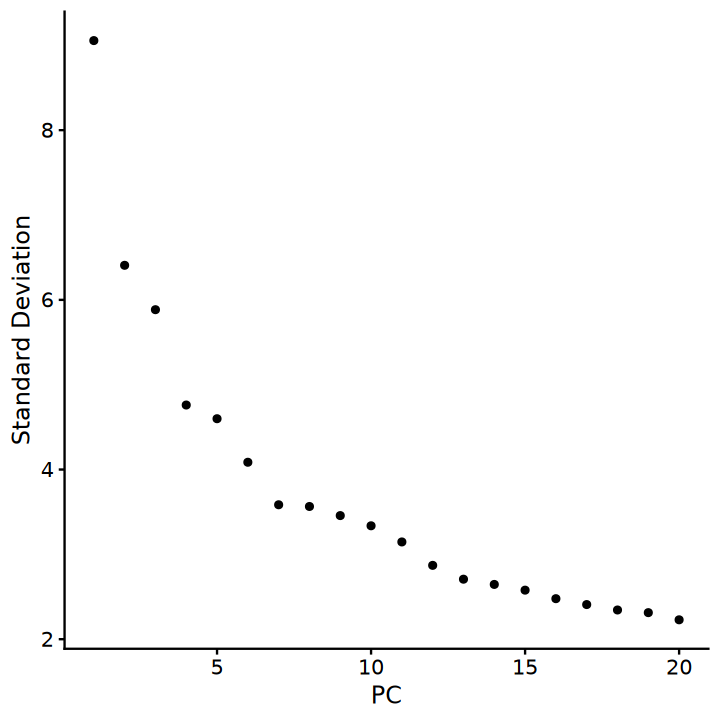

In [123]:
# Test RunUMAP with a fresh integration (WORKS!)
# Useful to find new clusters as smaller differences in gene expression across these cells are taken into account via re-integration preprocessing steps
options(future.globals.maxSize = 8000 * 1024^2)
data_merged_mesen_clean_woEndo_woPanc[["RNA"]] <- split(data_merged_mesen_clean_woEndo_woPanc[["RNA"]], f = data_merged_mesen_clean_woEndo_woPanc$study)
data_merged_mesen_clean_woEndo_woPanc <- NormalizeData(data_merged_mesen_clean_woEndo_woPanc)
data_merged_mesen_clean_woEndo_woPanc <- FindVariableFeatures(data_merged_mesen_clean_woEndo_woPanc)
data_merged_mesen_clean_woEndo_woPanc <- ScaleData(data_merged_mesen_clean_woEndo_woPanc)
data_merged_mesen_clean_woEndo_woPanc <- RunPCA(data_merged_mesen_clean_woEndo_woPanc)
data_merged_mesen_clean_woEndo_woPanc <- IntegrateLayers(data_merged_mesen_clean_woEndo_woPanc, method = HarmonyIntegration, orig.reduction = "pca", new.reduction = "harmony", verbose = FALSE)
ElbowPlot(data_merged_mesen_clean_woEndo_woPanc)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 282511
Number of edges: 8000377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9520
Number of communities: 10
Elapsed time: 192 seconds


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 282511
Number of edges: 8000377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 23
Elapsed time: 198 seconds


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
18:50:05 UMAP embedding parameters a = 0.9922 b = 1.112

18:50:05 Read 282511 rows and found 15 numeric columns

18:50:05 Using Annoy for neighbor search, n_neighbors = 30

18:50:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:50:33 Writing NN index file to temp file /t

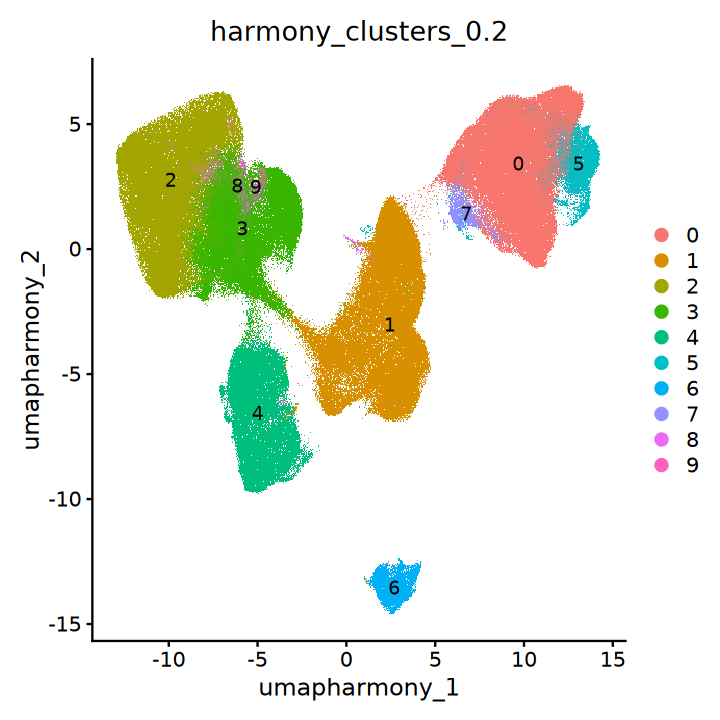

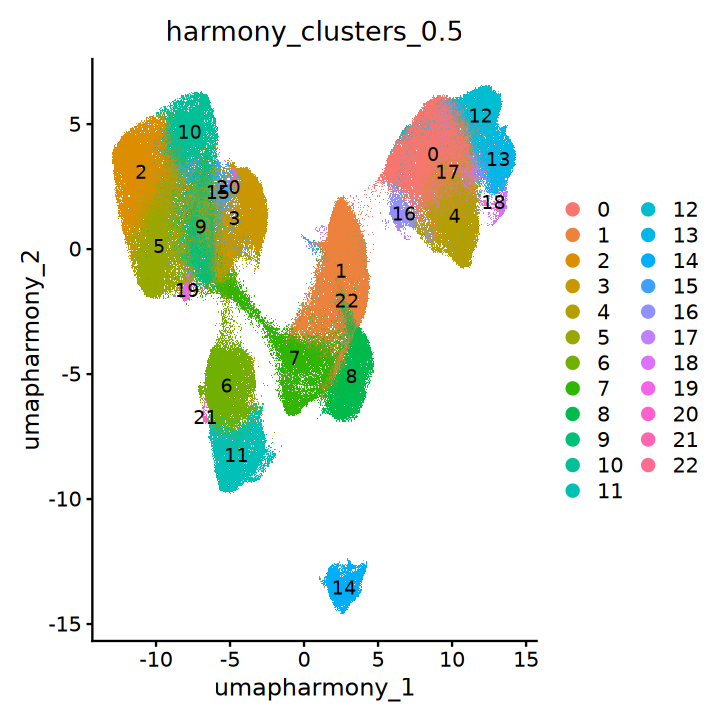

In [124]:
data_merged_mesen_clean_woEndo_woPanc <- FindNeighbors(data_merged_mesen_clean_woEndo_woPanc, reduction = "harmony", dims = 1:20)
data_merged_mesen_clean_woEndo_woPanc <- FindClusters(data_merged_mesen_clean_woEndo_woPanc, resolution = 0.2, cluster.name = "harmony_clusters_0.2")
data_merged_mesen_clean_woEndo_woPanc <- FindClusters(data_merged_mesen_clean_woEndo_woPanc, resolution = 0.5, cluster.name = "harmony_clusters_0.5")
data_merged_mesen_clean_woEndo_woPanc <- RunUMAP(data_merged_mesen_clean_woEndo_woPanc, reduction = "harmony", dims = 1:15, reduction.name = "umap.harmony")

options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_mesen_clean_woEndo_woPanc, label = T, group.by = "harmony_clusters_0.2")
options(repr.plot.height = 6, repr.plot.width = 6)
DimPlot(data_merged_mesen_clean_woEndo_woPanc, label = T, group.by = "harmony_clusters_0.5")

In [125]:
table(data_merged_mesen_clean_woEndo_woPanc$`harmony_clusters_0.2`, data_merged_mesen_clean_woEndo_woPanc$study)

   
    Adams  Deng Fonseca Habermann Kuppe  Panc Ramachandran Reyfman
  0  3431 12189   16637      6074 22878  2582         5325     859
  1    33    16   58782         5     7  1938            6      19
  2  2487  9556   40771      1932  1861   648           58      89
  3  2737  3621   14269      1838 19611   608          372     193
  4  1205  5545   12070      1418  5645   657         1852     142
  5  1064     5      17      2898  3650    56         1892     257
  6  1715   981    1698      1208   434   342          291     242
  7     8     0      27        17  2651     6          106       7
  8   372     2      25         7     6  1984            0       0
  9     0     1      10         4   552     0            8       2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



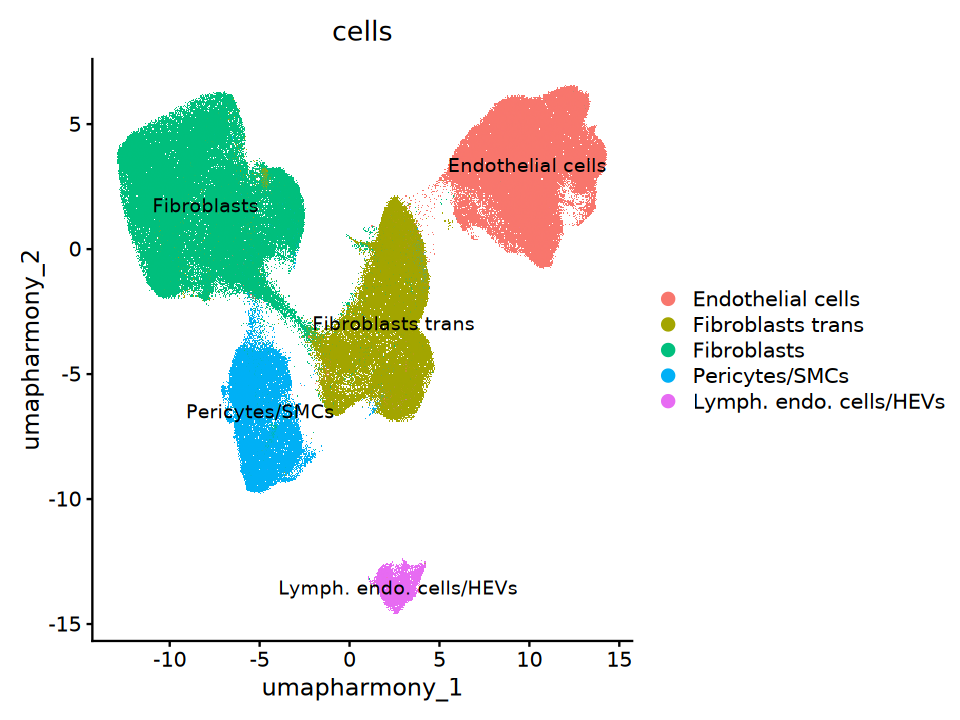

In [138]:
options(repr.plot.height = 6, repr.plot.width = 8)
DimPlot(data_merged_mesen_clean_woEndo_woPanc, label = T, group.by = "cells")

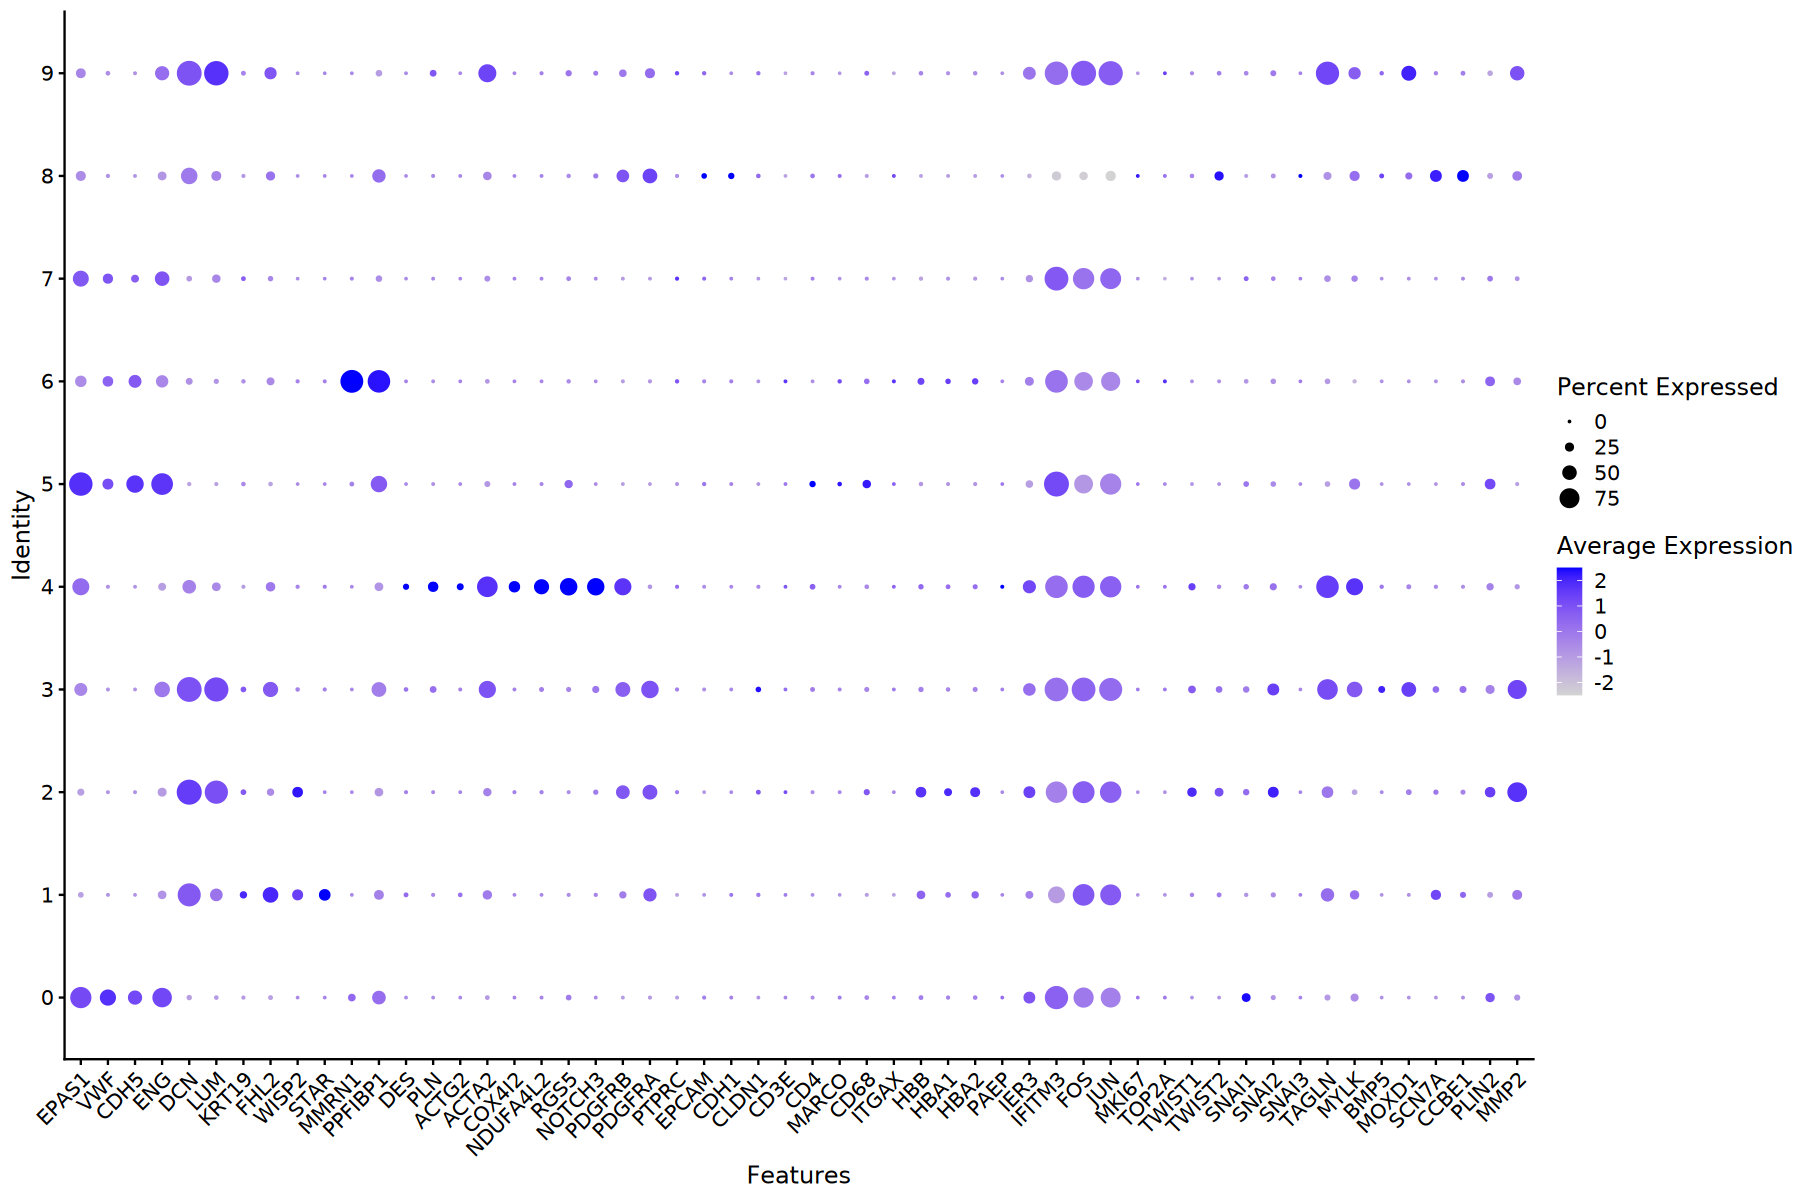

In [129]:
#Dotplotting - Look at main marker genes expression across the clusters
features <- c( "EPAS1", "VWF", "CDH5", "ENG", 
              "DCN",  "LUM", "KRT19", "FHL2", "WISP2", "STAR", "MMRN1", "PPFIBP1",
              "DES", "PLN", "ACTG2", "ACTA2", "COX4I2", "NDUFA4L2", "RGS5", "NOTCH3", "PDGFRB", "PDGFRA",
              "PTPRC", "EPCAM", "CDH1", "CLDN1", "CD3E", "CD4", "MARCO", "CD68", "ITGAX", "HBB", "HBA1", "HBA2",
            "PAEP", "IER3", "IFITM3", "FOS", "JUN", "MKI67", "TOP2A", "TWIST1", "TWIST2", "SNAI1", "SNAI2", "SNAI3", "TAGLN", "MYLK", "BMP5", "MOXD1", "SCN7A", "CCBE1", "PLIN2", "MMP2"
             ) 
options(repr.plot.width=15, repr.plot.height=10)
DotPlot(data_merged_mesen_clean_woEndo_woPanc, features = features, group.by = "harmony_clusters_0.2") + RotatedAxis()

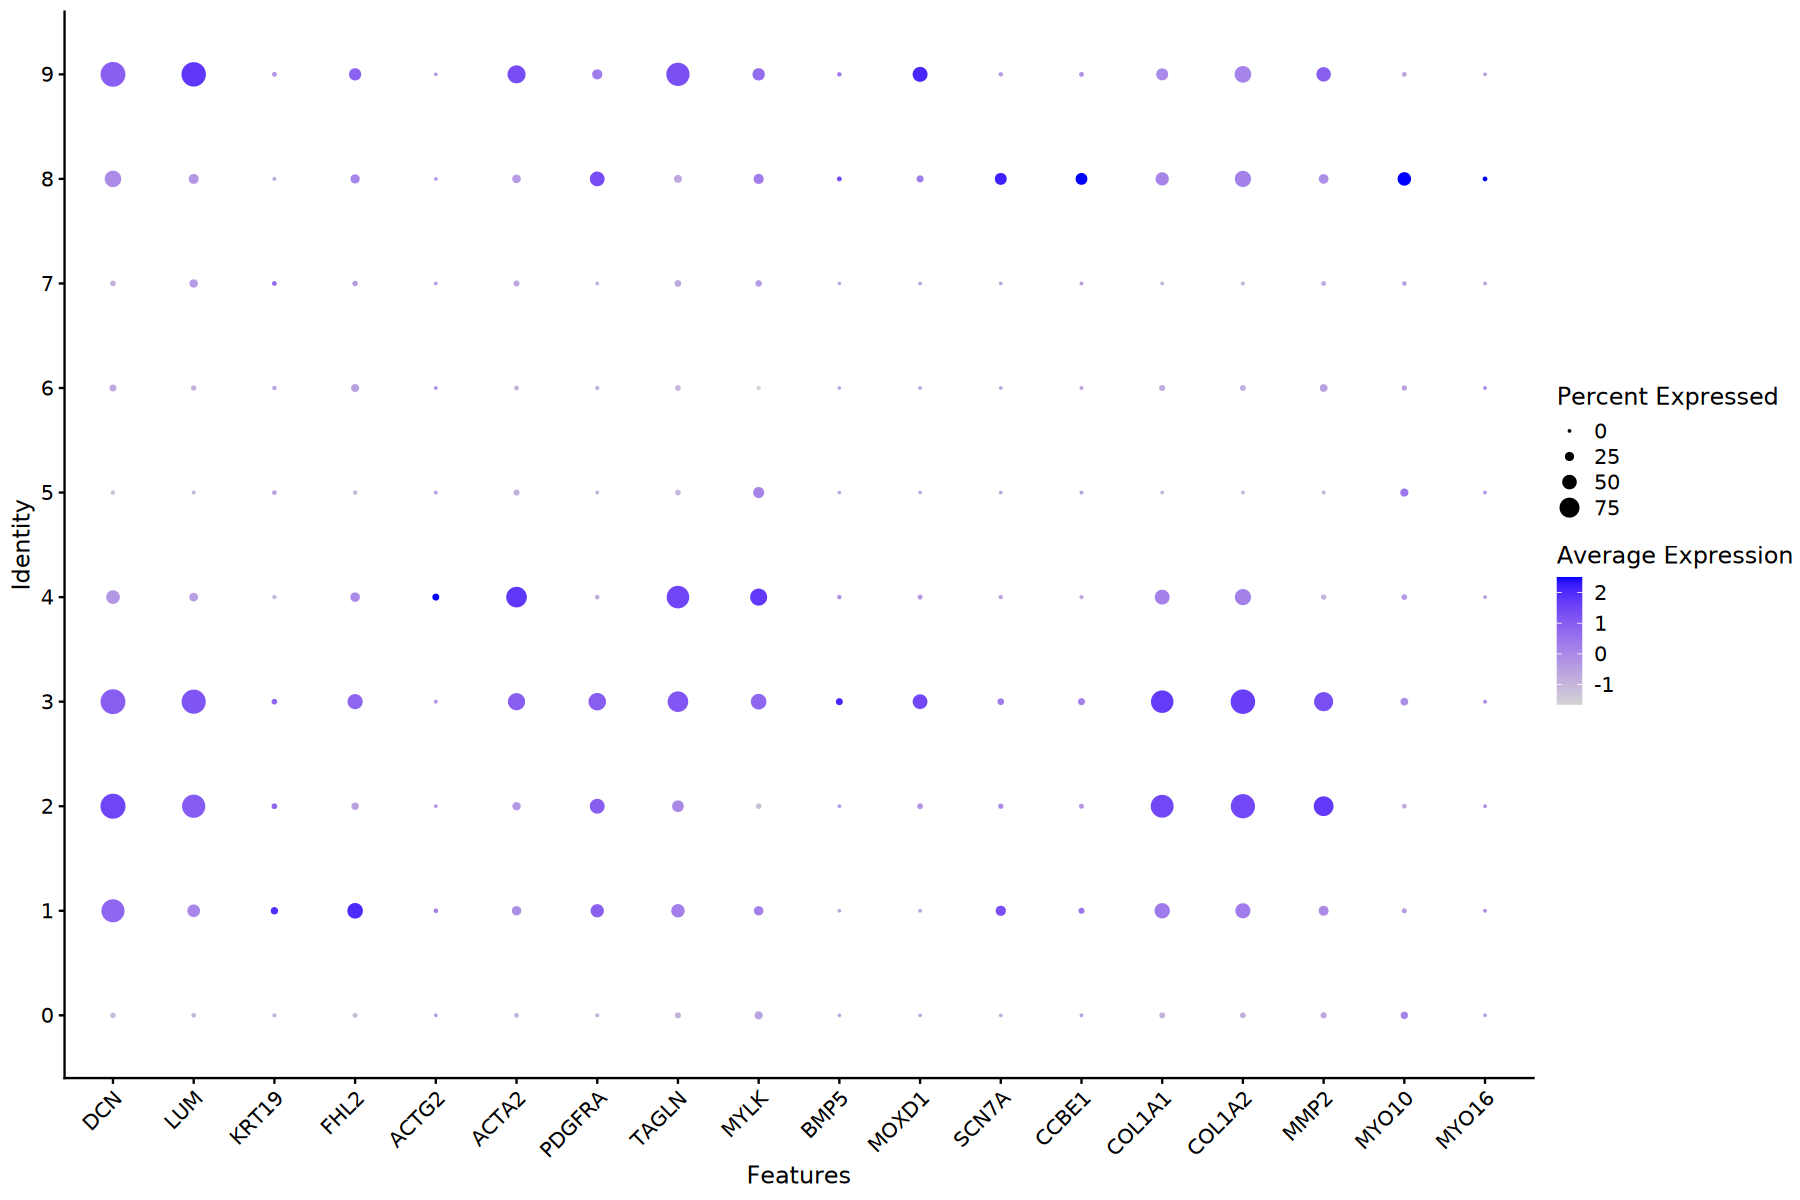

In [158]:
#Dotplotting
features <- c( 
              "DCN",  "LUM", "KRT19", "FHL2",
              "ACTG2", "ACTA2",  "PDGFRA",
             "TAGLN", "MYLK", "BMP5", "MOXD1", "SCN7A", "CCBE1", "COL1A1","COL1A2", "MMP2", "MYO10", "MYO16"
             ) 
options(repr.plot.width=15, repr.plot.height=10)
DotPlot(data_merged_mesen_clean_woEndo_woPanc, features = features, group.by = "harmony_clusters_0.2") + RotatedAxis()

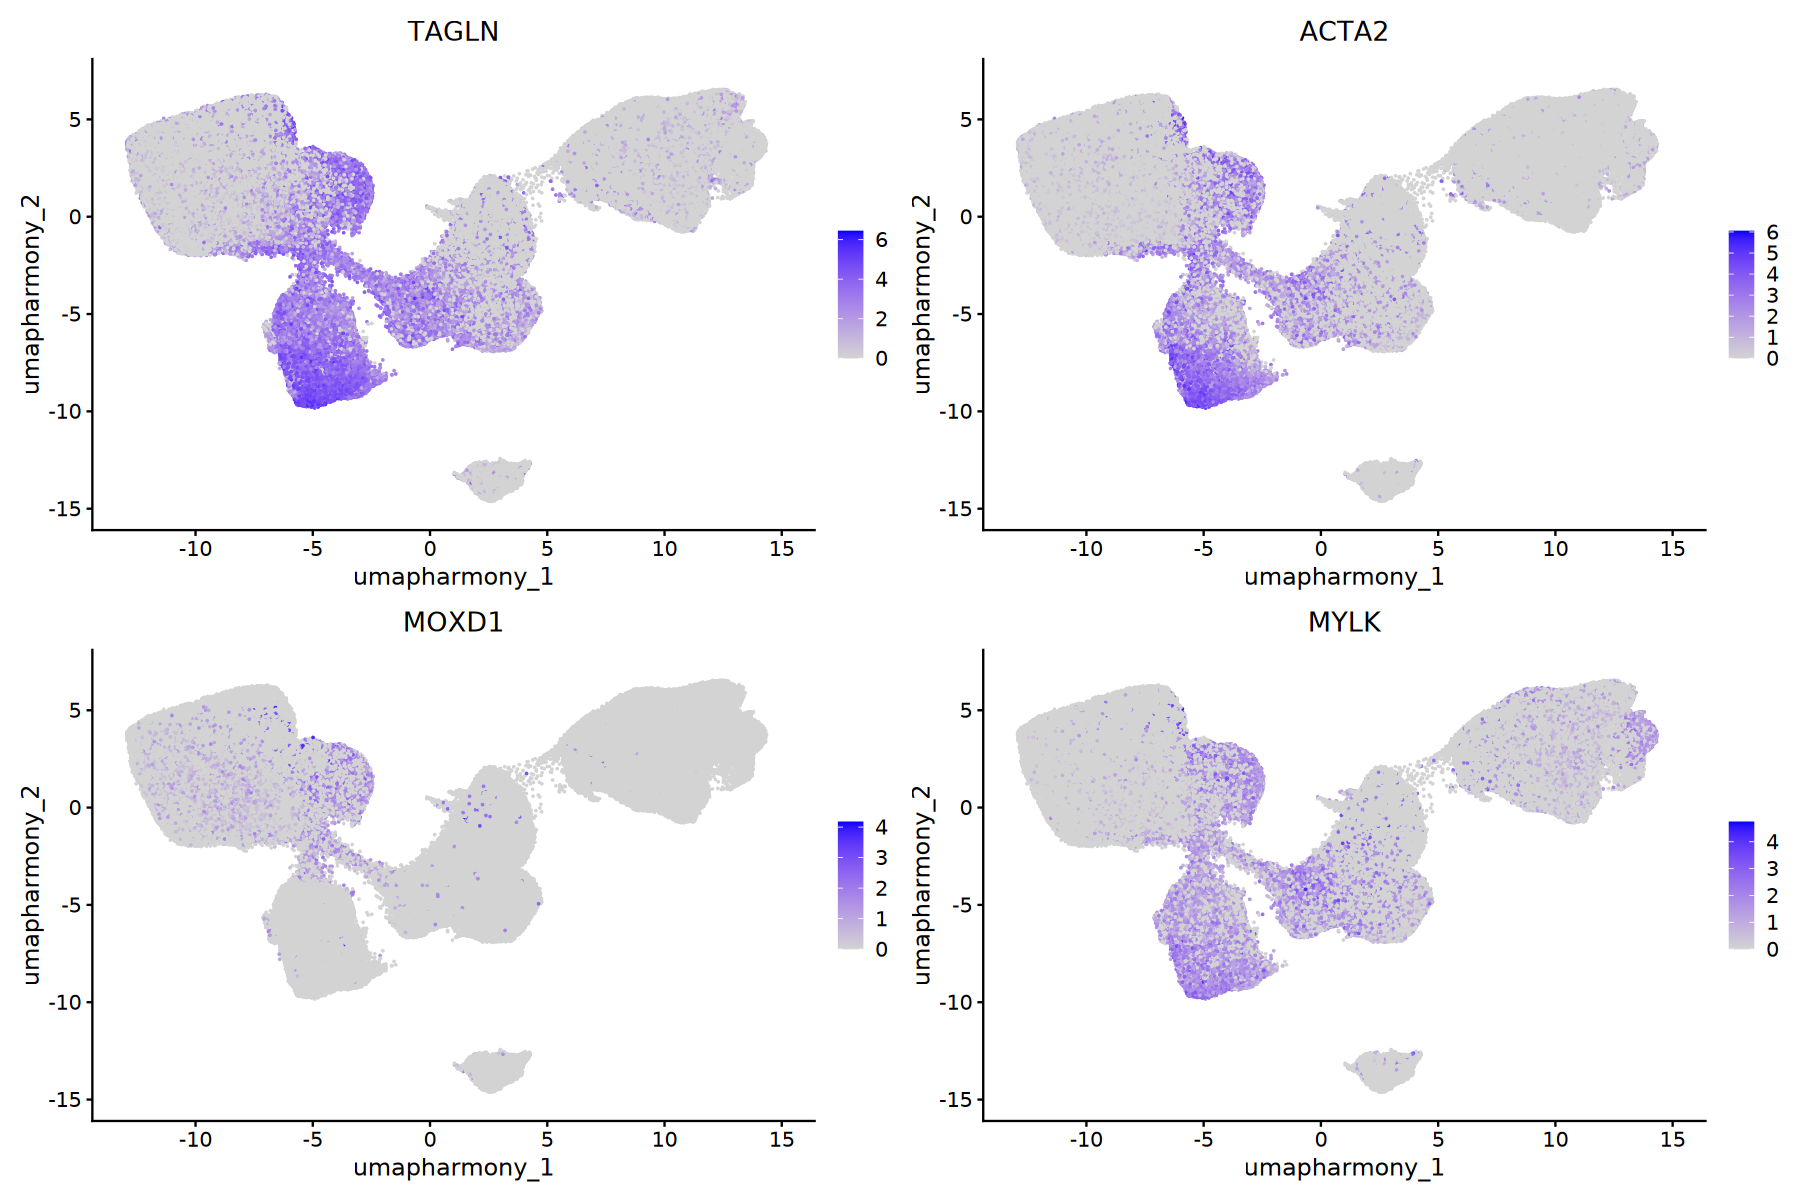

In [132]:
#Annotation of cells - Lymph endo cells
options(repr.plot.width=15, repr.plot.height=10)
FeaturePlot(data_merged_mesen_clean_woEndo_woPanc, reduction = "umap.harmony", features = c("TAGLN", "ACTA2", "MOXD1", "MYLK"), raster = FALSE, order = FALSE) 

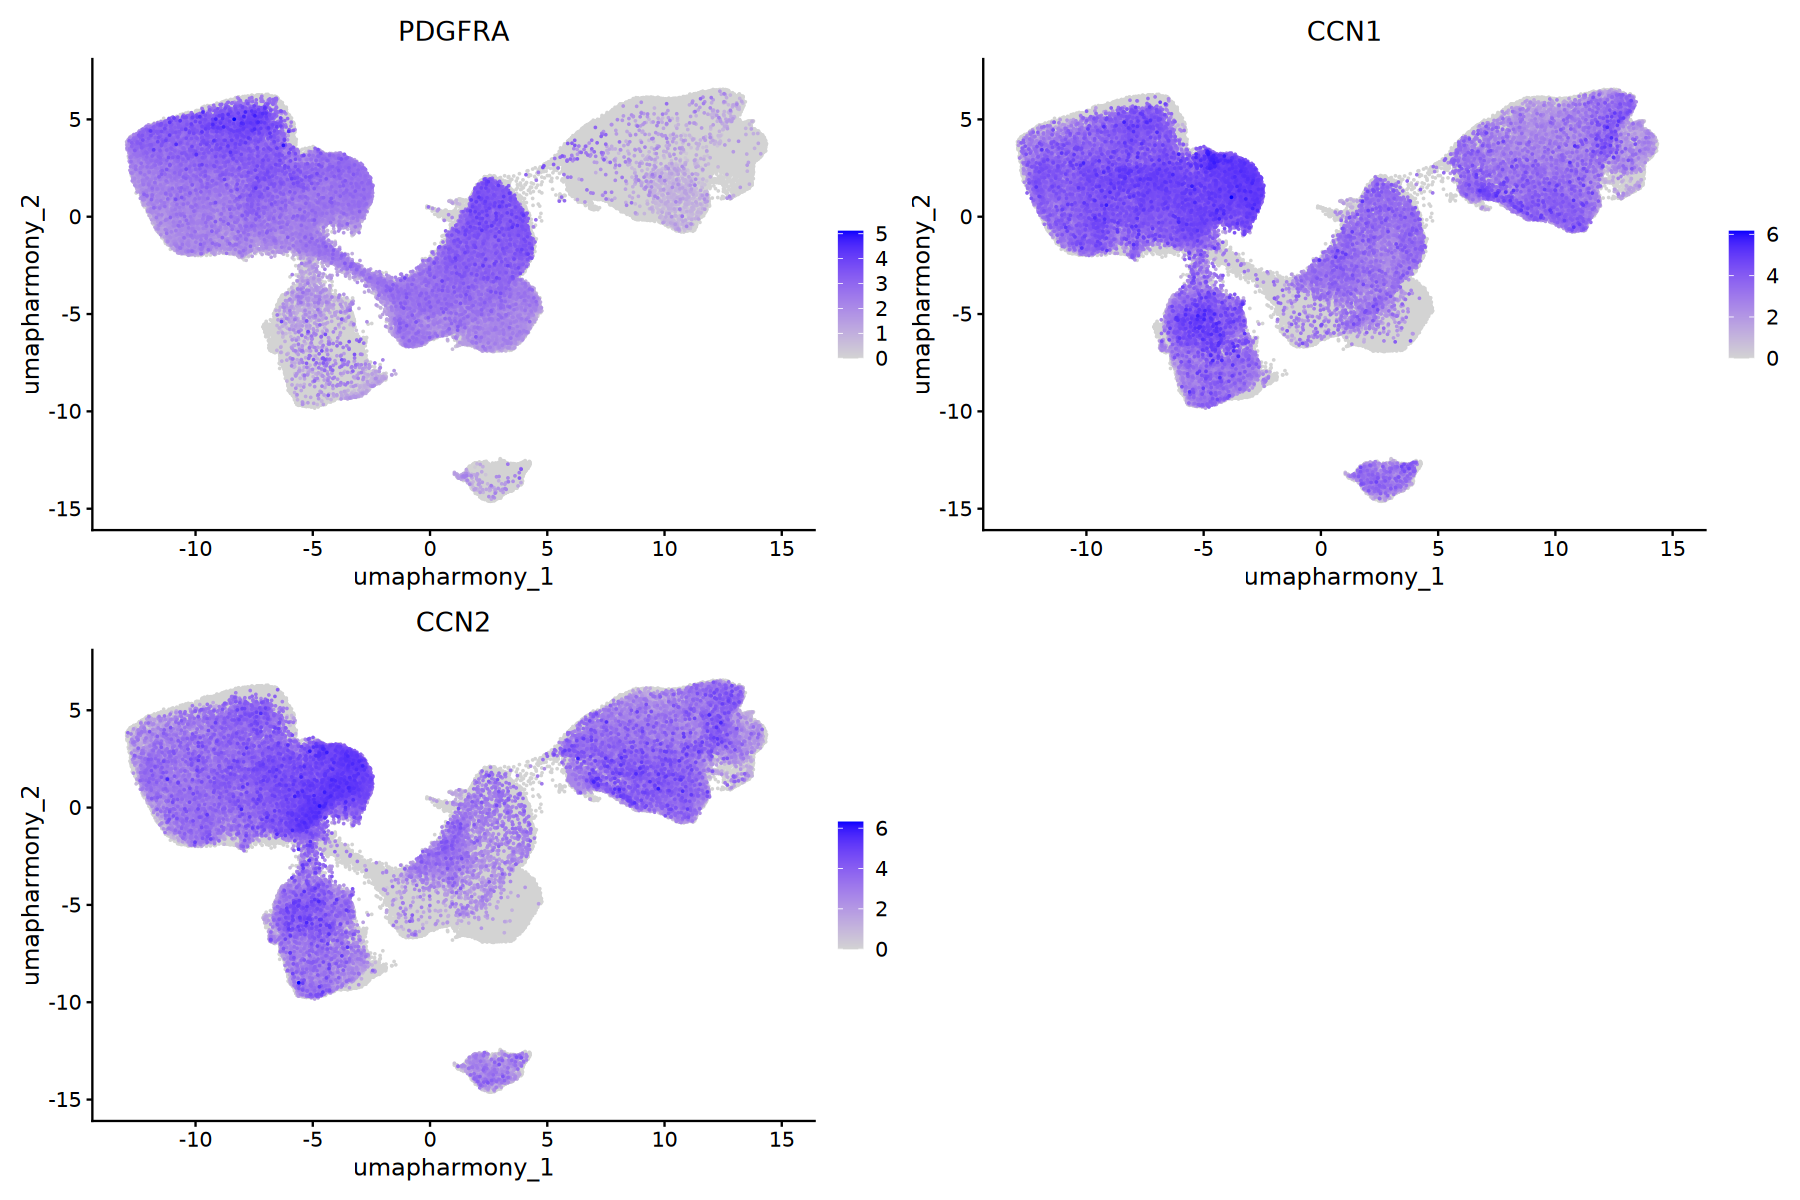

In [141]:
#Annotation of cells - Lymph endo cells
options(repr.plot.width=15, repr.plot.height=10)
FeaturePlot(data_merged_mesen_clean_woEndo_woPanc, reduction = "umap.harmony", features = c("PDGFRA", "CCN1", "CCN2"), raster = FALSE, order = TRUE) 

In [134]:
data_merged_mesen_clean_woEndo_woPanc <- JoinLayers(data_merged_mesen_clean_woEndo_woPanc)

In [139]:
#Markers of 1
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Integration_mesen")
library(future)
plan("multicore", workers = 6)
data_merged_mesen_clean_woEndo_woPanc@active.ident <- as.factor(data_merged_mesen_clean_woEndo_woPanc$`harmony_clusters_0.2`)
cls1 <- FindMarkers(data_merged_mesen_clean_woEndo_woPanc, ident.1 = 1, ident = c(3, 2), logfc.threshold = 1)
cls1$genes <- rownames(cls1)
write.xlsx(cls1, "data_merged_mesen_cls1_versusfibroblasts.xlsx") 

Warning message:
“Cannot find cell-level meta data named  cells”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



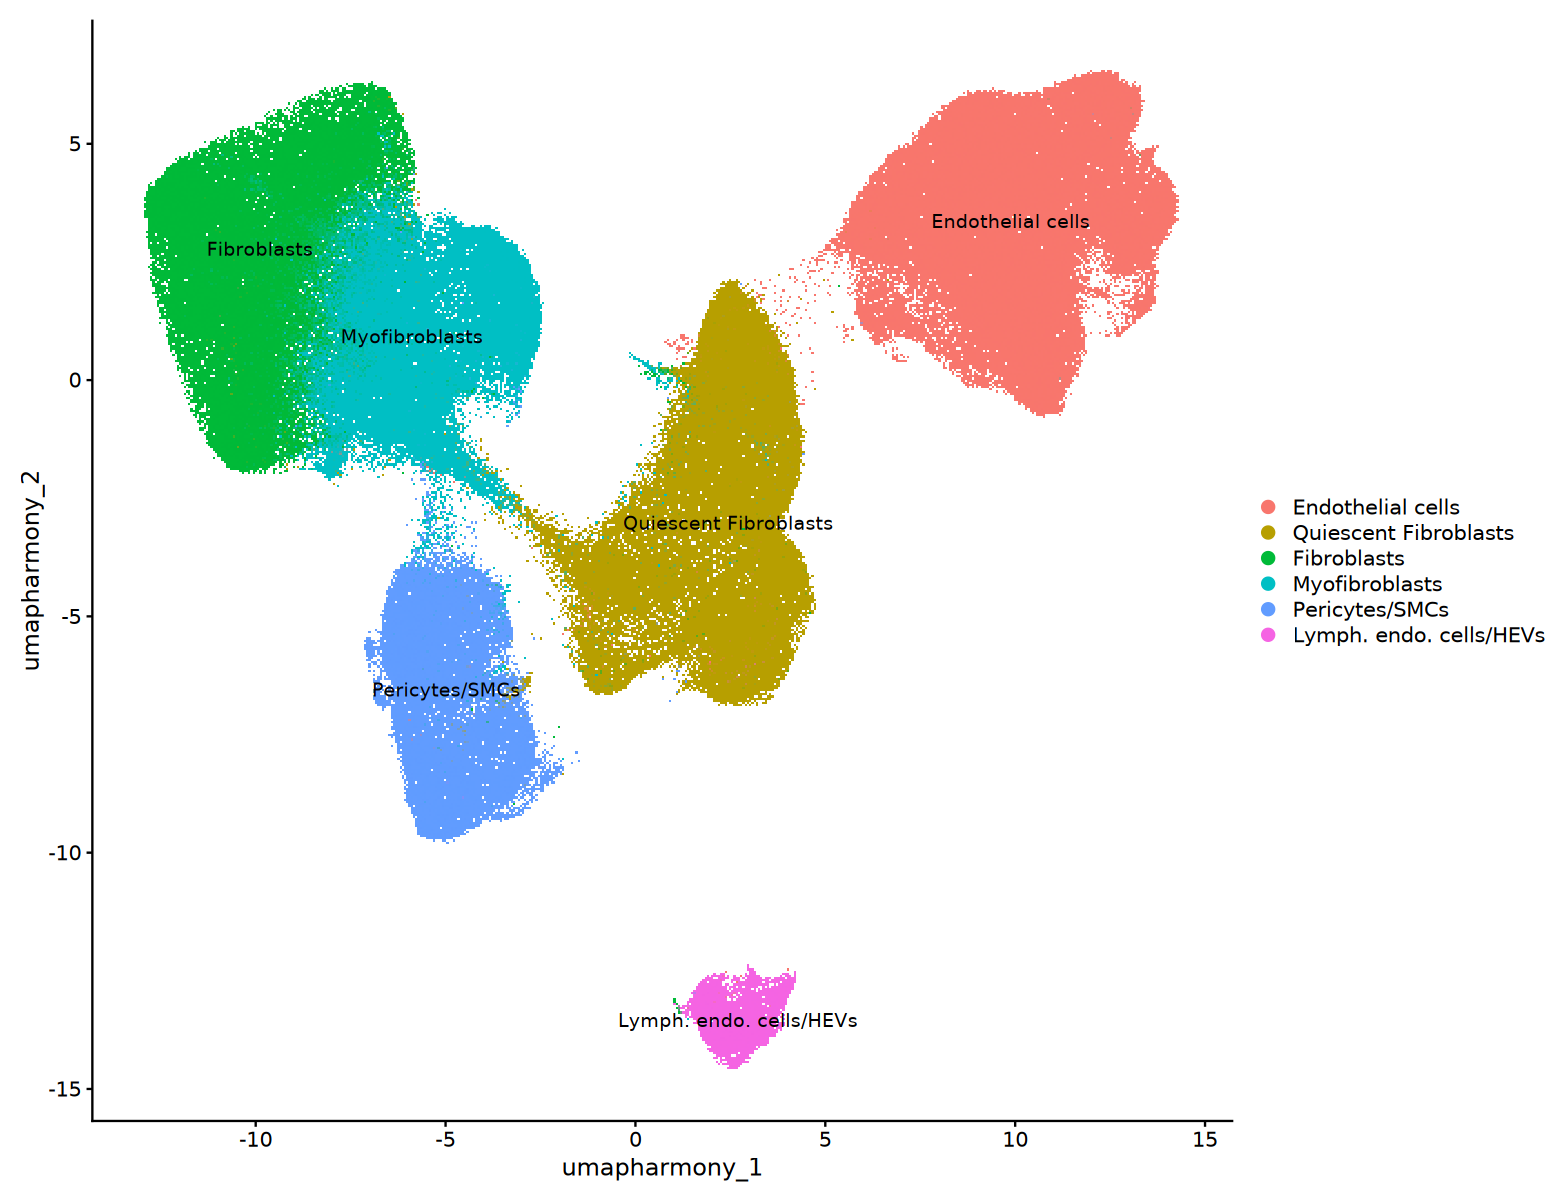

In [6]:
#Assigning new names
data_merged_mesen_clean_woEndo_woPanc$cells <- NULL
data_merged_mesen_clean_woEndo_woPanc@active.ident <- factor(data_merged_mesen_clean_woEndo_woPanc$`harmony_clusters_0.2`)

cluster.ids.new <- c("Endothelial cells", "Quiescent Fibroblasts", "Fibroblasts", "Myofibroblasts", 
                     "Pericytes/SMCs", "Endothelial cells", "Lymph. endo. cells/HEVs", "Endothelial cells", 
                     "Myofibroblasts", "Myofibroblasts"

)

names(cluster.ids.new) <- levels(data_merged_mesen_clean_woEndo_woPanc)
data_merged_mesen_clean_woEndo_woPanc <- RenameIdents(data_merged_mesen_clean_woEndo_woPanc, cluster.ids.new)
options(repr.plot.width=13, repr.plot.height=10)
DimPlot(data_merged_mesen_clean_woEndo_woPanc, reduction = "umap.harmony", label = TRUE)
data_merged_mesen_clean_woEndo_woPanc$cells <- data_merged_mesen_clean_woEndo_woPanc@active.ident

In [3]:
cellytpe_colors <- c(
    "Endothelial cells" = "#f9c7be",
  "Fibroblasts" = "#e65c6f",
    "Myofibroblasts" = "#ff9a00",
    "Quiescent Fibroblasts" = "#ffd7b5",
  "Lymph. endo. cells/HEVs" = "#f98d77",
     "Pericytes/SMCs" = "#bd4545"


)

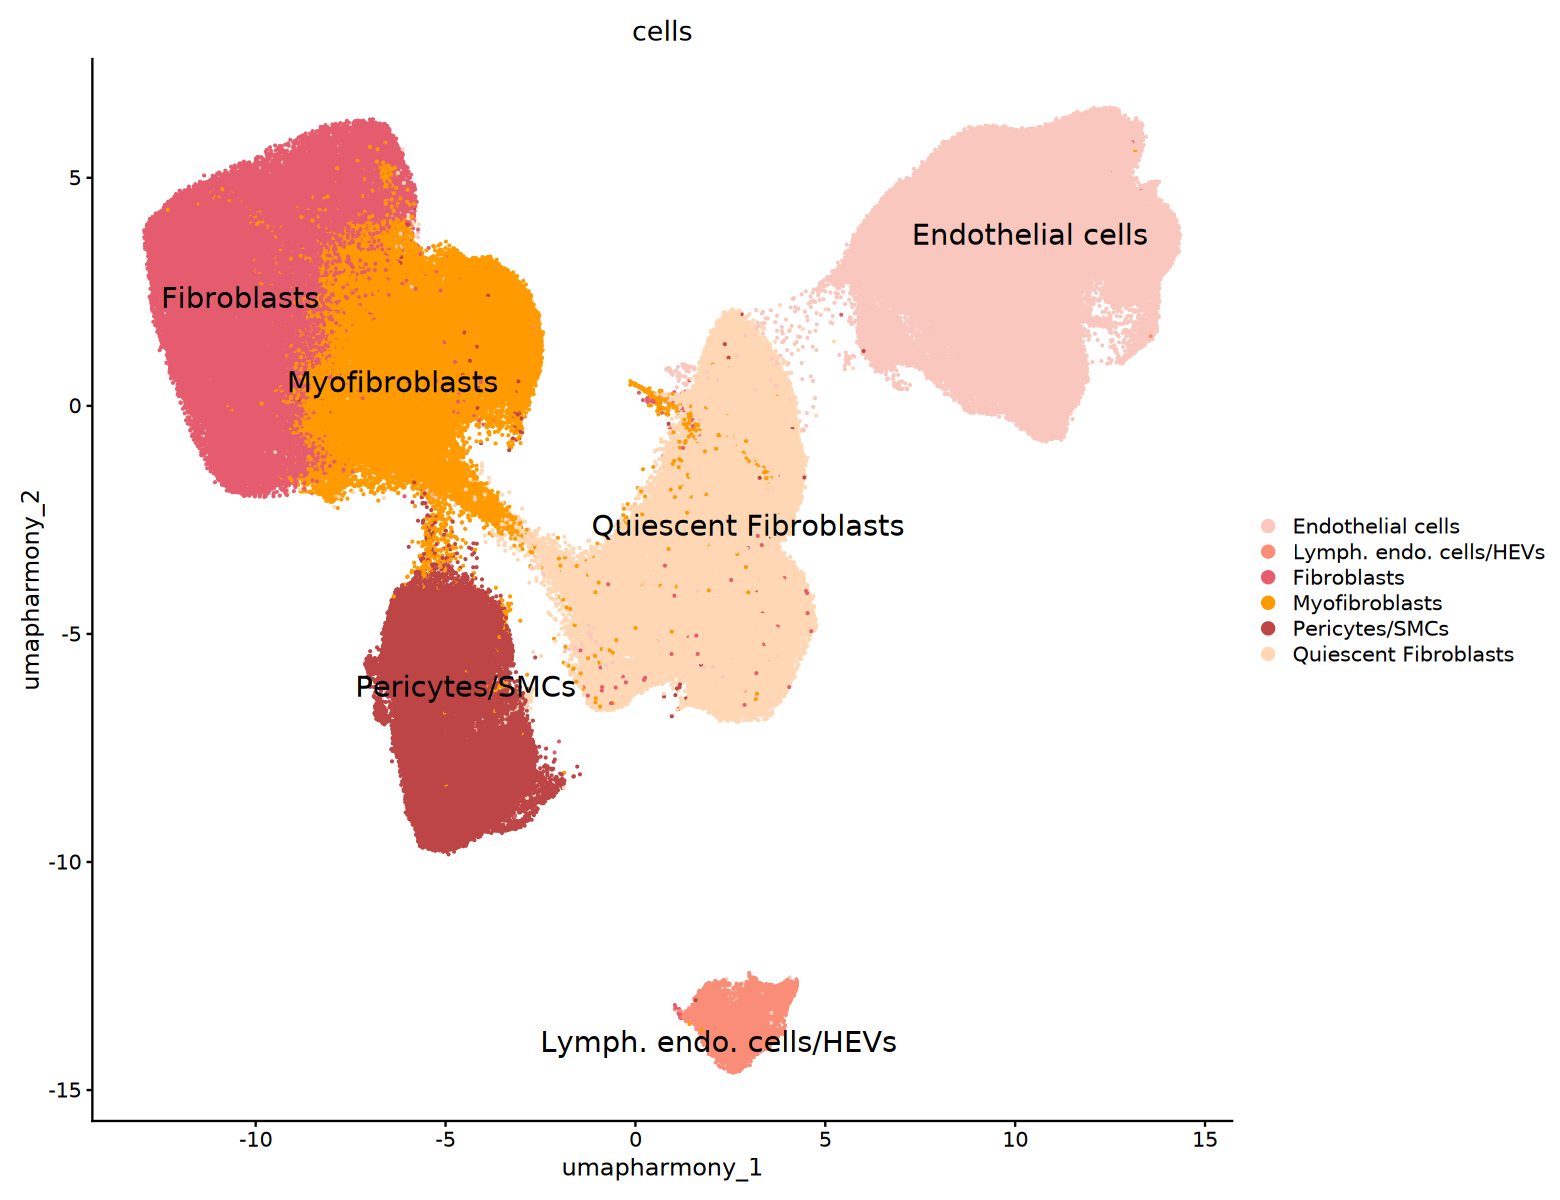

In [5]:
options(repr.plot.width=13, repr.plot.height=10)
DimPlot(data_merged_mesen_clean_woEndo_woPanc, reduction = "umap.harmony", cols = cellytpe_colors,  label = TRUE, repel = TRUE, group.by = "cells",pt.size = 0.1, label.size = 6, raster = FALSE)

In [22]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Figures")
p <- DimPlot(data_merged_mesen_clean_woEndo_woPanc, reduction = "umap.harmony", cols = cellytpe_colors,  label = TRUE, repel = TRUE, group.by = "cells",pt.size = 0.1, label.size = 6, raster = FALSE)
ggsave("data_merged_mesen_UMAP_final.png", plot = p, width = 13, height = 10)

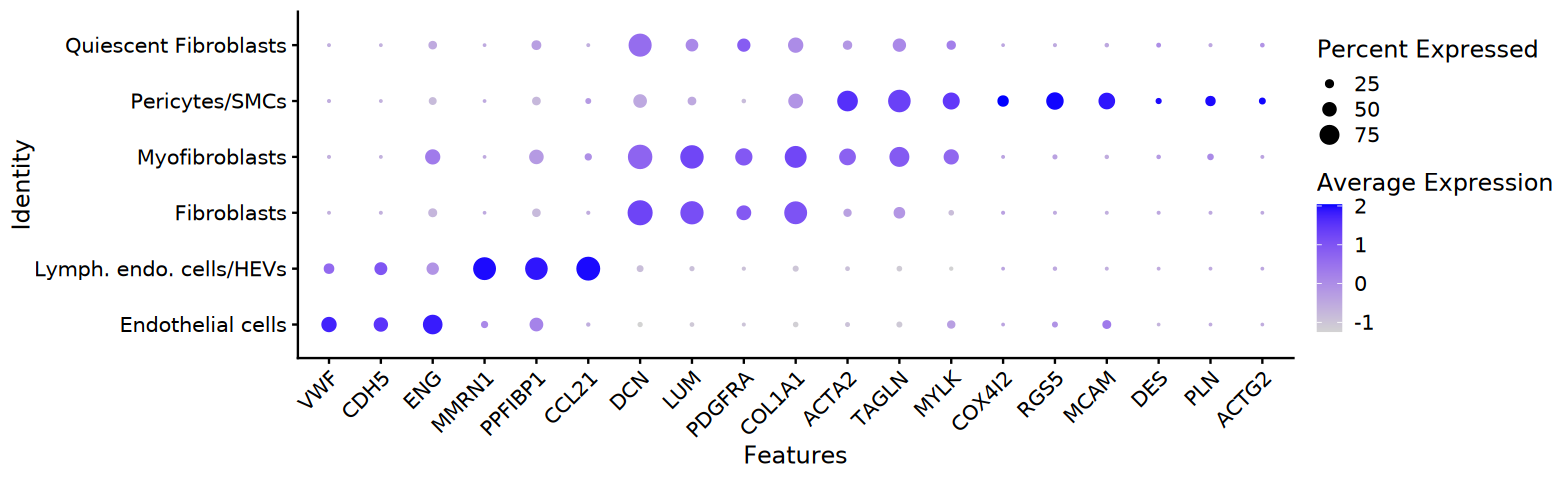

In [21]:
#Dotplotting - for thesis
data_merged_mesen_clean_woEndo_woPanc@active.ident <- factor(data_merged_mesen_clean_woEndo_woPanc$cells)
data_merged_mesen_clean_woEndo_woPanc$cells <- factor(data_merged_mesen_clean_woEndo_woPanc$cells, levels = c( "Endothelial cells", "Lymph. endo. cells/HEVs",
                                                            "Fibroblasts", "Myofibroblasts",
                                                            "Pericytes/SMCs", "Quiescent Fibroblasts"))
features <- c( "VWF", "CDH5", "ENG", "MMRN1", "PPFIBP1", "CCL21",
               "DCN",  "LUM", "PDGFRA", 
               "COL1A1", "ACTA2", "TAGLN", "MYLK", 
              "COX4I2",  "RGS5", "MCAM", "DES", "PLN", "ACTG2"
             ) 
options(repr.plot.width=13, repr.plot.height= 4)
DotPlot(data_merged_mesen_clean_woEndo_woPanc, features = features, group.by = "cells") + RotatedAxis()

In [14]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Figures")
p <- DotPlot(data_merged_mesen_clean_woEndo_woPanc, features = features, group.by = "cells") + RotatedAxis()
ggsave("data_merged_mesen_dotplot_final.pdf", plot = p, width = 13, height = 4)

In [169]:
data_merged_mesen_clean_woEndo_woPanc$disease <- data_merged_mesen_clean_woEndo_woPanc$condition

In [170]:
data_merged_mesen_clean_woEndo_woPanc$condition <- ifelse(data_merged_mesen_clean_woEndo_woPanc$condition == "control", "control", "fibrotic")

In [15]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Integration_mesen")
save(data_merged_mesen_clean_woEndo_woPanc, file = "data_merged_mesen_finalsubset_ann.RData")

In [1]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Integration_mesen")
load("data_merged_mesen_finalsubset_ann.RData")

In [10]:
#Sankey diagram
library(networkD3)
contingency_table <- table(data_merged_mesen_clean_woEndo_woPanc$cells, data_merged_mesen_clean_woEndo_woPanc$study)
contingency_table <- as.data.frame.matrix(contingency_table)
contingency_table$source <- rownames(contingency_table)
rownames(contingency_table) <- NULL
contingency_table$source <- factor(contingency_table$source, levels = sort(unique(contingency_table$source)))
library(reshape2)  # Make sure the reshape2 package is installed
contingency_table_long <- melt(contingency_table, id.vars = "source", variable.name = "target", value.name = "value")
nodes <- unique(c(as.character(contingency_table_long$source), as.character(contingency_table_long$target)))
nodes_df <- data.frame(name = nodes)
contingency_table_long$sourceID <- match(contingency_table_long$source, nodes_df$name) - 1
contingency_table_long$targetID <- match(contingency_table_long$target, nodes_df$name) - 1
contingency_table_long <- contingency_table_long[contingency_table_long$value > 10, ] 
options(repr.plot.width=14, repr.plot.height=5)



Attaching package: ‘networkD3’


The following object is masked from ‘package:Seurat’:

    JS


The following object is masked from ‘package:SeuratObject’:

    JS



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




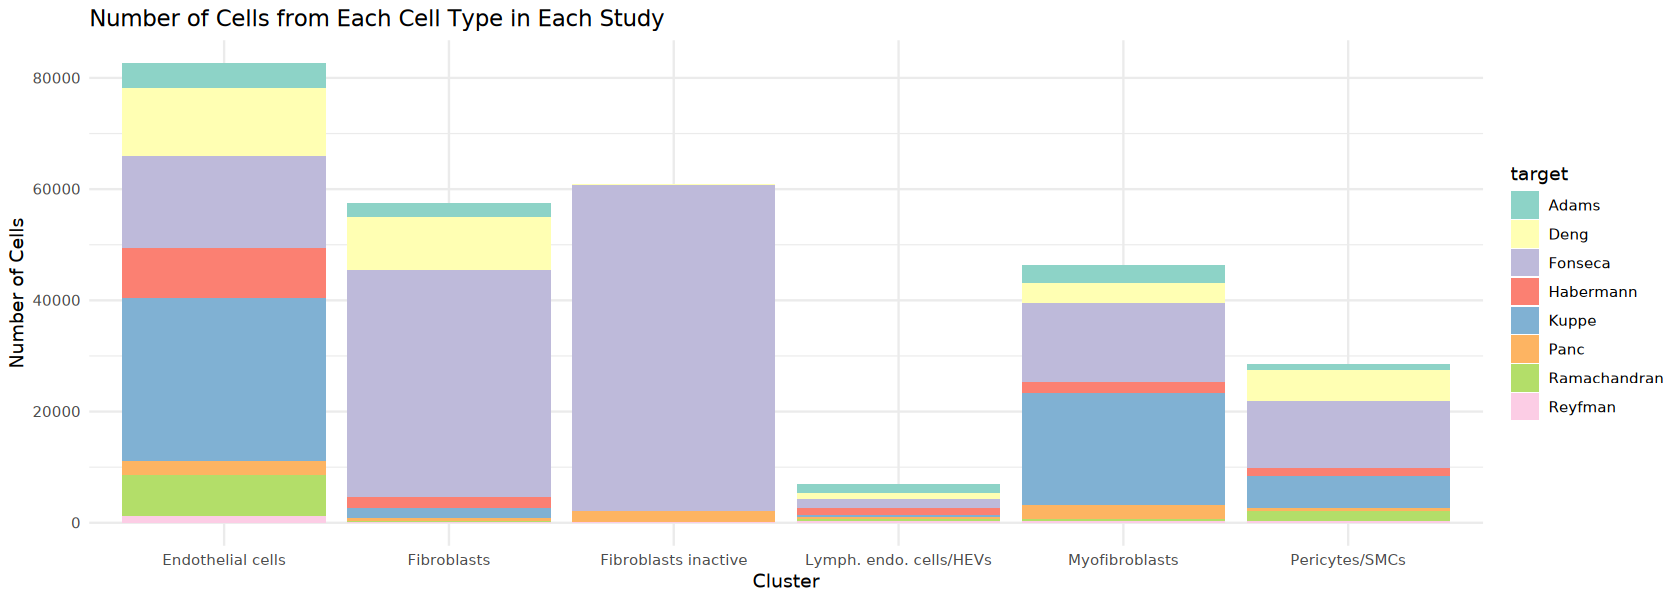

In [12]:
ggplot(contingency_table_long, aes(x = source, y = value, fill = target)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Cells from Each Cell Type in Each Study",
       x = "Cluster",
       y = "Number of Cells", sort = F) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

In [183]:
contingency_table

Adams Deng  Fonseca Habermann Kuppe Panc Ramachandran Reyfman
1 4503  12194 16681   8989      29179 2644 7323         1123   
2 2487   9556 40771   1932       1861  648   58           89   
3 3109   3624 14304   1849      20169 2592  380          195   
4   33     16 58782      5          7 1938    6           19   
5 1715    981  1698   1208        434  342  291          242   
6 1205   5545 12070   1418       5645  657 1852          142   
  source                 
1 Endothelial cells      
2 Fibroblasts            
3 Myofibroblasts         
4 Fibroblasts inactive   
5 Lymph. endo. cells/HEVs
6 Pericytes/SMCs

In [ ]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/Figures")
p <- DimPlot(data_merged_mesen_clean_woEndo_woPanc, reduction = "umap.harmony", cols = cellytpe_colors,  label = TRUE, repel = TRUE, group.by = "cells",pt.size = 0.1, label.size = 5, raster = FALSE)
ggsave("data_merged_mesen_UMAP_final.pdf", plot = p, width = 13, height = 10)

In [18]:
# Calculate the total number of cells in each dataset
contingency_table_long <- contingency_table_long %>%
  group_by(source) %>%
  mutate(Total = sum(value)) %>%
  ungroup()

# Calculate the percentage
contingency_table_long <- contingency_table_long %>%
  mutate(Percentage = (value / Total) * 100)

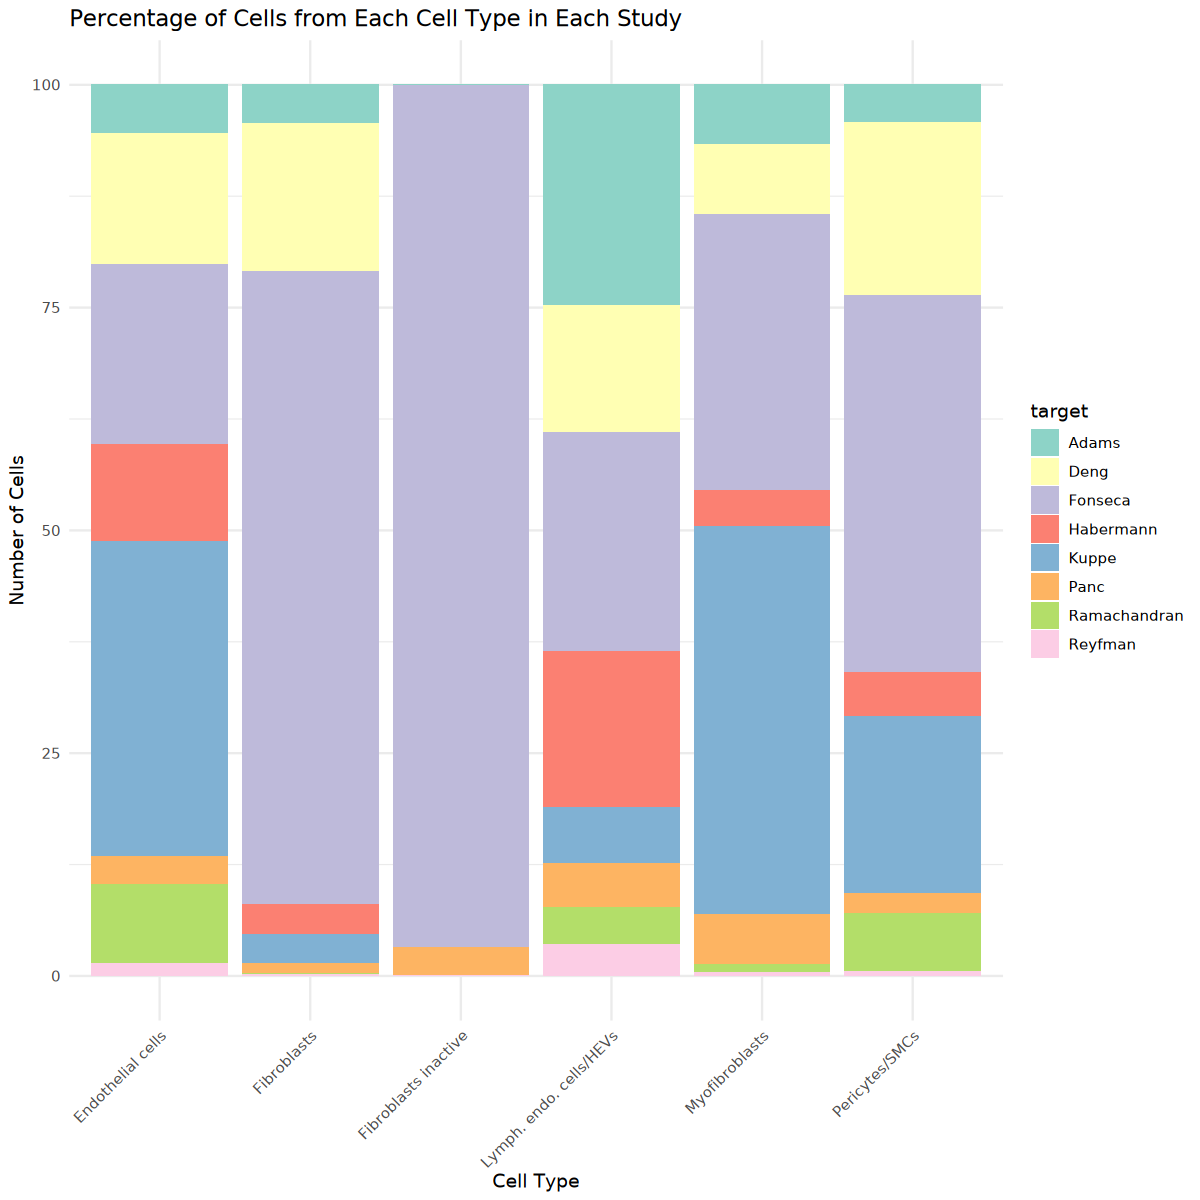

In [25]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(contingency_table_long, aes(x = source, y = Percentage, fill = target)) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Cells from Each Cell Type in Each Study",
       x = "Cell Type",
       y = "Number of Cells") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") + RotatedAxis()